## Theory [2]

* [0.4] What are [computer ports](https://www.cloudflare.com/learning/network-layer/what-is-a-computer-port/) on a high level? How many ports are there on a typical computer?

According to OSI conceptual model, ports are main part of transport layer (4 layer). Transport layer of OSI model is responsible for end-to-end communication between computers (devices more general). In case of sending data this layer divides information into so called segments (segmentation) before drop it to network layer (3 layer). Transport layer of reciving device reassamble segments (reassambling) into data before sending it to session level (5 level). Ports are a way to organize incoming information. For example, the third level (network layer) uses IP addresses to establish communication between devices. IP itself does not have information about which ports to use. Moving on to the fourth level, TCP/UDP protocols are used, which can determine the port and direct data to the necessary port. There are a total of 65,535 ports, but not all of them are naturally used. For instance, files have their own port—File Transfer Protocol (FTP), which uses ports 20 or 21. Other examples include Port 80 for Hypertext Transfer Protocol (HTTP) and Port 443 for HTTP Secure (HTTPS).
* [0.4] What is Nginx? How does it work on the high level? List several alternative web servers.

Nginx is a web server and reverse proxy that efficiently maintain concurrent connections. Nginx is capable of relieving the main server by creating a so-called buffer (reverse proxy) to serve as an intermediary layer that processes requests and performs routing (where to direct the request). Additionally, NGINX utilizes caching to enhance the processing speed of requests that have already been handled. For instance, if there are multiple services performing the same function, NGINX can balance the load among them. Several alternative web servers include Apache HTTP Server, Microsoft IIS, LiteSpeed Web Server, Caddy, Cherokee, HAProxy, and Tomcat, each with specific features and use cases.
* [0.4] What is SSH, and for what is it typically used? Explain two ways to authenticate in an SSH server in detail.

SSH (Secure Shell) is a protocol for secure remote access that provides an encrypted connection between a client and a server. Since SSH provide secure access to server, it requires authentication to permit access. First way to authenticate is simple username and password. The server checks whether the entered password matches the one set for that user. If it does, the user gains access to the system. That system is not very reliable, because susceptible to password brute-force attacks. Second way is Key-based Authentication: cryptographic keys (public and private) are used in this case. The user generate a key pair: public and private. The public key is stored on the server, and the private key remains only with the user. When the user attempts to connect to the server, their client offers the server their public key.
If the server recognizes the public key and is configured to use it, it sends a challenge for the user to sign using their private key. If the signature is valid, the user gains access to the system.

* [0.4] What is a pipeline (in bioinformatics)? Why are they so popular in bioinformatics and not in other areas?

In bioinformatics, a pipeline refers to a series of computational and analytical tools or processes chained together to analyze biological data efficiently. These pipelines are designed to automate and streamline the analysis of large and complex datasets, such as those generated by DNA sequencing technologies. Each step in the pipeline performs a specific task, and the output of one step becomes the input for the next. In simple words pipeline is aggregate of tools and specific performing order.

There are few reasons why pipelines is so popular in bioinformatics. First of all biological data, especially omics data, is often large and intricate. Piplines help manage complexity by breaking down a analisys into modular and manageble steps. Futher piplelines facilitate reproducibility of research: defining a series of steps in pipeline, researchers can be ensure that their analyses are consistent and repeatable. Then bioinformatics pipelines automate repetitive tasks, reducing the likelihood of human errors and speeding up the analysis process. This is crucial when dealing with vast amounts of data. And finally pipelines promote standardization in data analysis methodologies.

While bioinformatics heavily relies on pipelines, other scientific disciplines may prefer more flexible and diverse approaches to data analysis, depending on the characteristics of their data and research questions.

* [0.4] Explain how Snakemake and Nextflow work on the high level. I.e., what are their general paradigms?

Snakemake is a workflow management system. Its paradigm is built around the idea of specifying rules that define how to create output files from input files. The rules are written in a Python-like language, and the relationships between rules form a directed acyclic graph (DAG) representing the workflow.Users define rules that describe how to produce output files from input files. These rules include the command to execute, input files, output files. Snakemake automatically generates a DAG based on the dependencies specified in the rules. Each node in the DAG represents a rule, and the edges represent the flow of data between rules.

Nextflow is a bioinformatics workflow manager! Workflows in Nextflow are built using processes, which are encapsulated, reusable units of computation. Each process defines the command to execute, input parameters, and output files.Nextflow uses a data-driven programming model, where data flows through channels. Channels represent data streams, and processes consume and produce data. This allows for implicit parallelization and distribution of tasks.Nextflow automatically resolves dependencies by tracking data dependencies between processes. It ensures that processes are executed in the correct order based on the availability of required input data.

## Problem [6.5]

A real-life situation that occurred to me several times over the years.

Imagine wrapping up a large bioinformatics project and wanting to share raw data with your colleagues in a friendly and straightforward format. The best option would be to use an online genome browser and host your data remotely, so it is easily accessible by anyone with a valid link. This is exactly what we will be doing here.

*Please consider doing this HW using Linux since setting up the SSH client on Windows is painful, and I won't be able to help you.*


Steps:
* [1.5] Create a new virtual machine in the Yandex/Mail/etc cloud (order at least 10GB of free disk space). Generate SSH key pair and use it to connect to your server.

Example of what your machine can look like
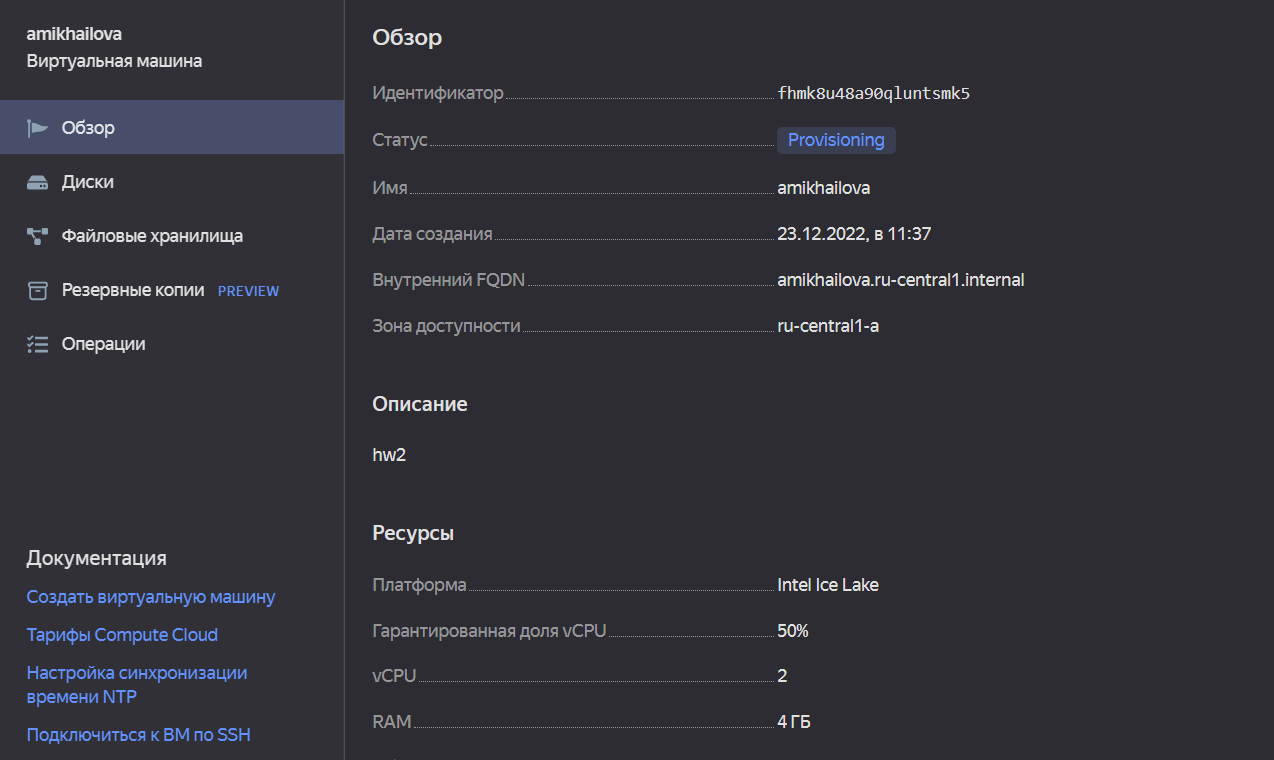

* [1] Download and install [JBrowse 2](https://jbrowse.org/jb2/). Create a new jbrowse [repository](https://jbrowse.org/jb2/docs/cli/#jbrowse-create-localpath) in `/mnt/JBrowse/` (or some other folder).

<u>*TIP*</u>  One of the possible way is via [npm](https://www.npmjs.com/package/@jbrowse/cli).
Do not forget `jbrowse create JBrowse`

* [0.5] Install nginx and amend its config(/etc/nginx/nginx.conf) to contain the following section:
```
http {
  # Don't touch other options!
  # ........
  # ........

  # Comment this:
  #include /etc/nginx/sites-enabled/*

  # Add this:
  server {
		listen 80;
		index index.html;
    server_name _;

		location /jbrowse/ {
			alias /home/user/JBrowse/;
		}
	}

  # ........
}
```
* [0.5] Restart the nginx (reload its config) and make sure that you can access the browser using a link like this: `http://64.129.58.13/jbrowse/`. Here `64.129.58.13` is your public IP address.

* [1] Download the latest human genome assembly (GRCh38) from the Ensemble FTP server ([fasta](https://ftp.ensembl.org/pub/release-108/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz), [GFF3](https://ftp.ensembl.org/pub/release-108/gff3/homo_sapiens/Homo_sapiens.GRCh38.108.gff3.gz)). Index the fasta using samtools (`samtools faidx`) and GFF3 using tabix.

<u>*TIP*</u> there is an bgzip error in gff3 file, code below can help you

` grep -v "^#" Homo_sapiens.GRCh38.108.gff3 | sort -t"`printf '\t'`" -k1,1 -k4,4n) | bgzip > sorted.Homo_sapiens.GRCh38.108.gff3.gz;`

* [1] Select and download BED files for three ChIP-seq and one ATAC-seq experiment from the ENCODE (use one tissue/cell line). Sort, bgzip, and index them using tabix.

<u>*TIP*</u> You can you the data from ML homework.

* [1] [Add](https://jbrowse.org/jb2/docs/cli/) your files to the genome browser and verify that everything works as intended. Don't forget to [index](https://jbrowse.org/jb2/docs/cli/#jbrowse-text-index) the genome annotation, so you could later search by gene names.


**Remember to put a persistent link to a session with all your BED files and the genome annotation in the report. I must be able to access it without problems.**


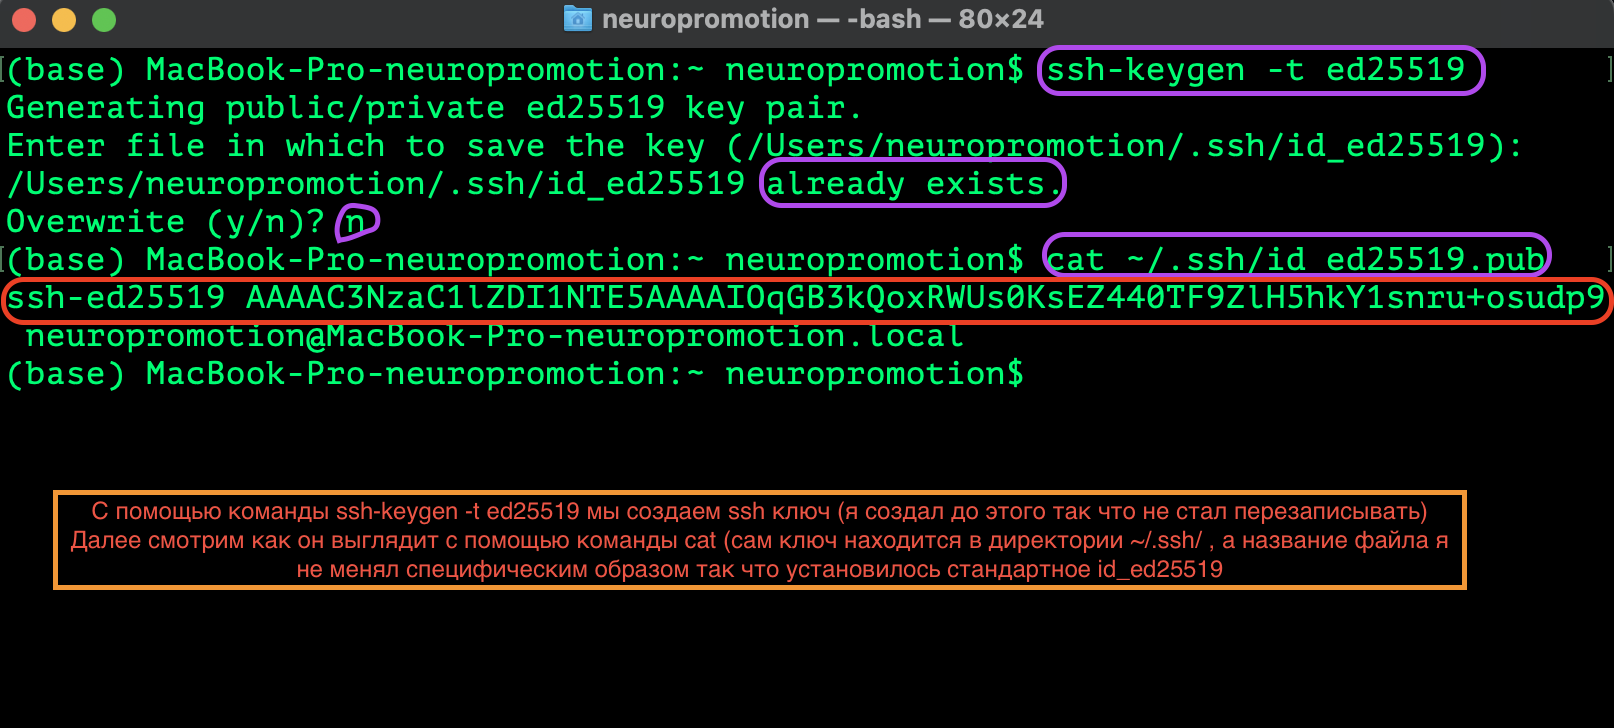

# Сама виртуальная машина: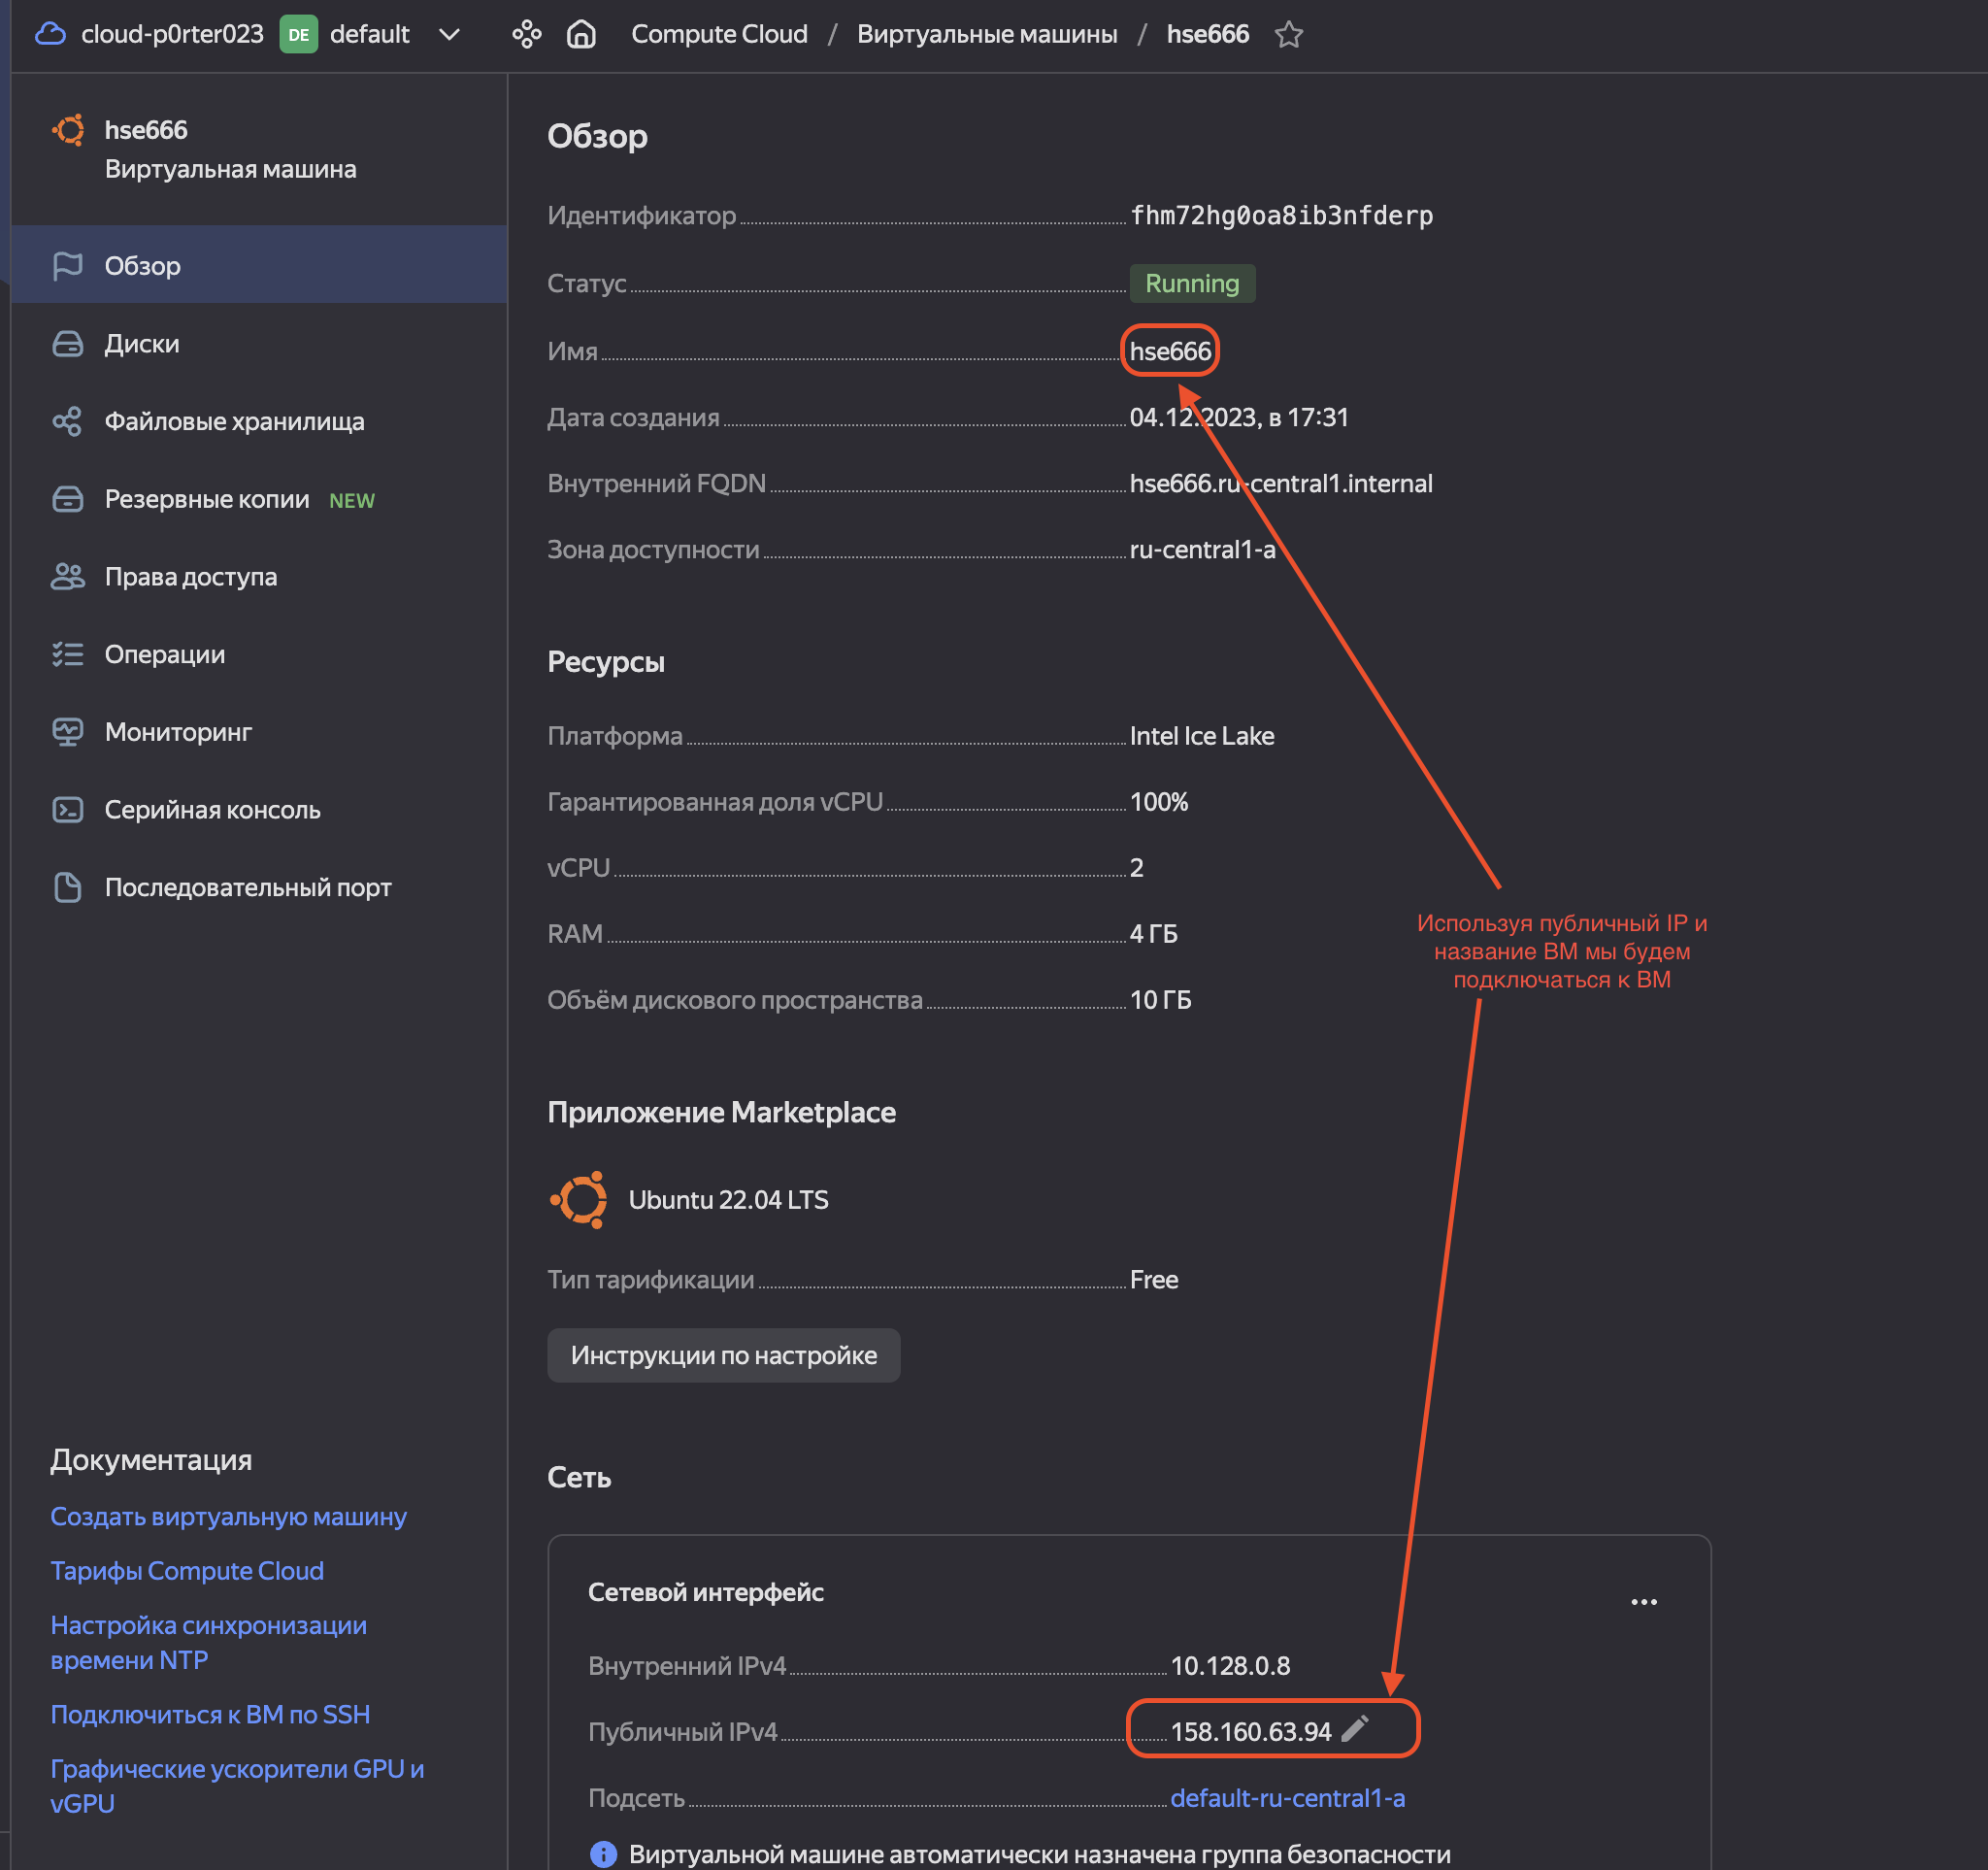

# Запускам ВМ через терминал: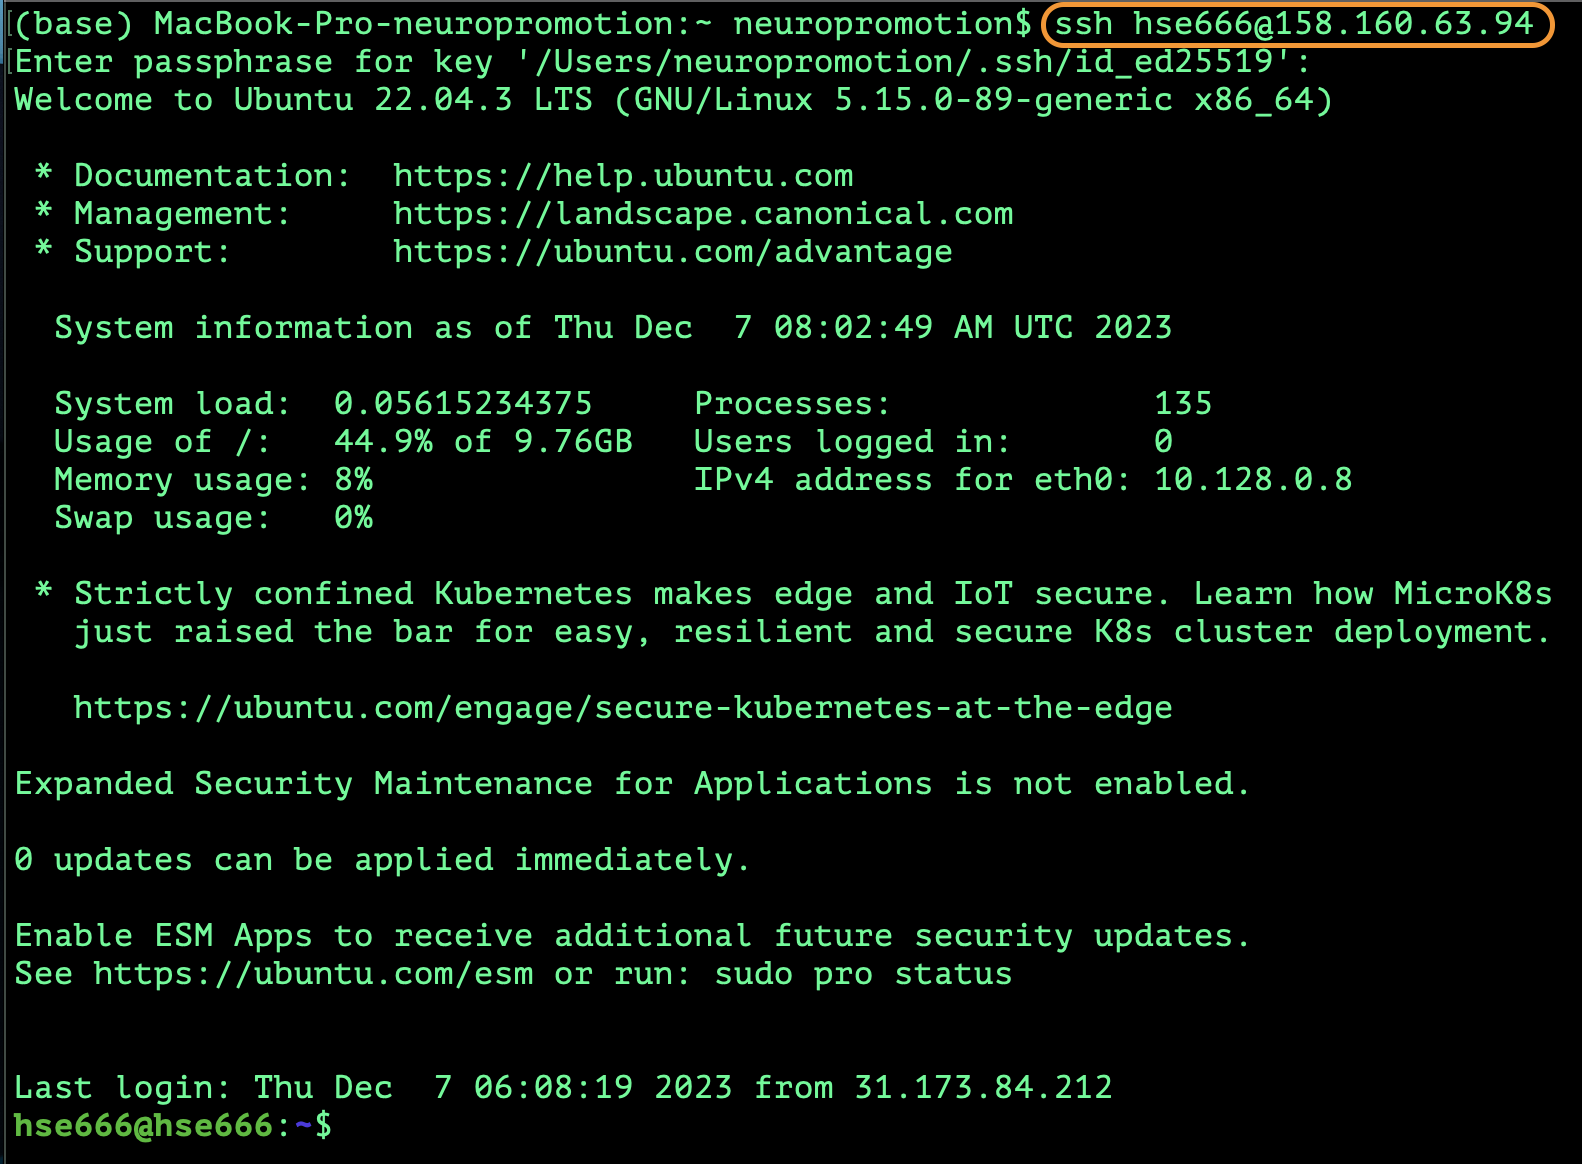

# заходим на https://github.com/nvm-sh/nvm и в файле README копируем команду  curl для скачивания nvm: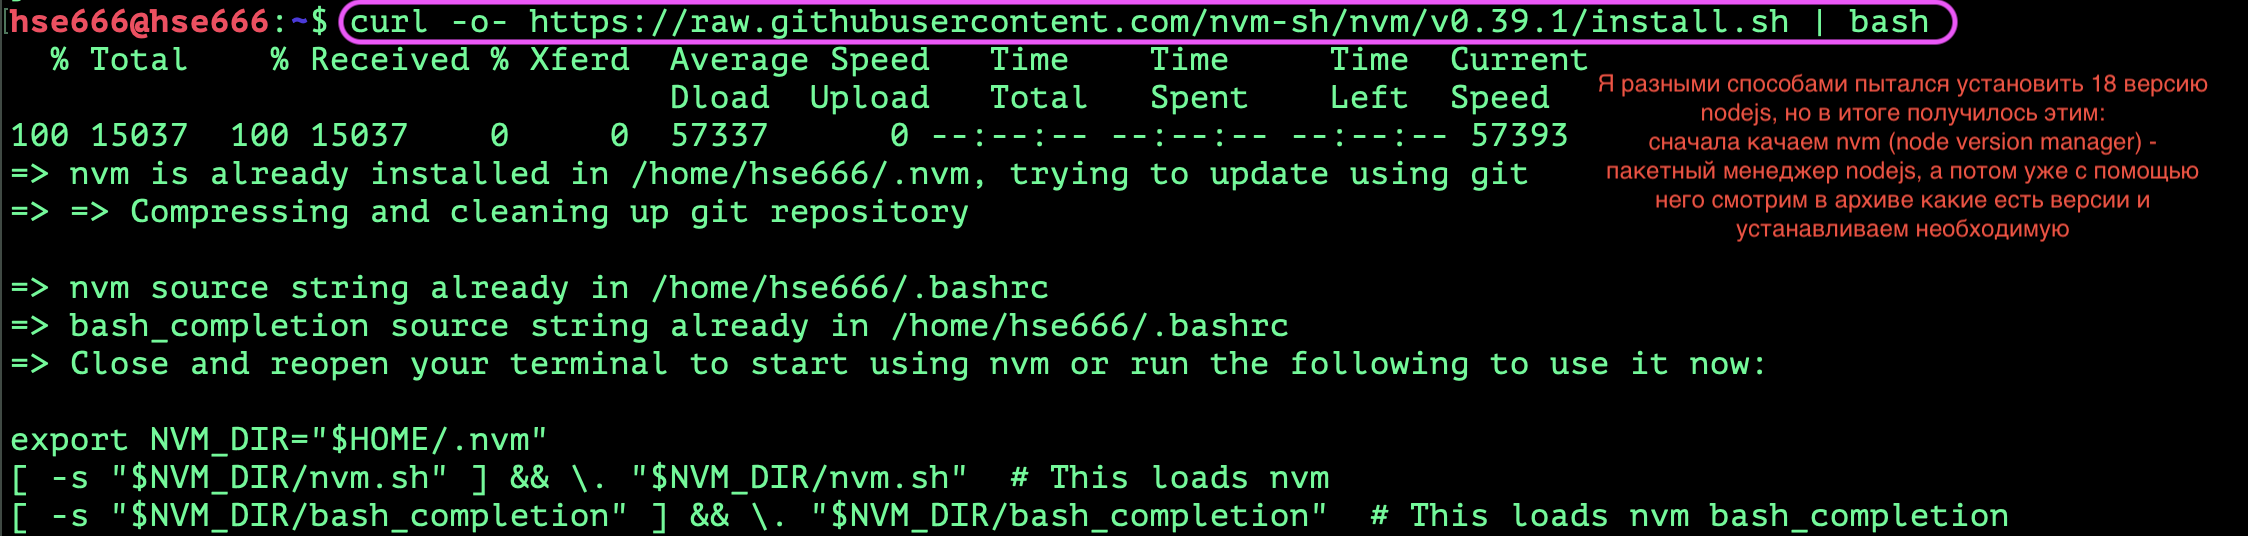

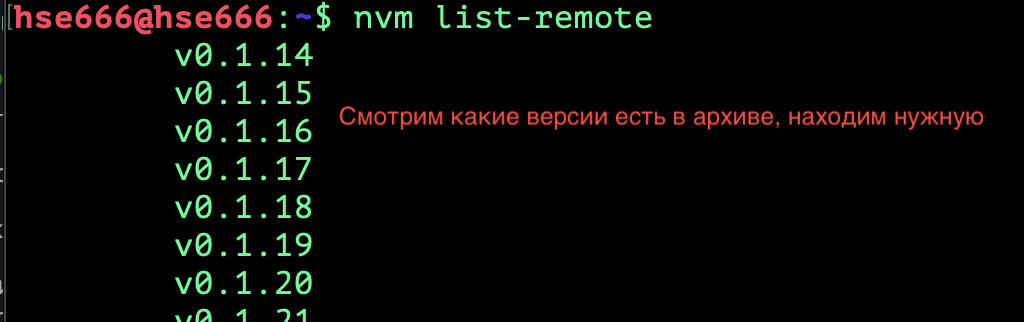

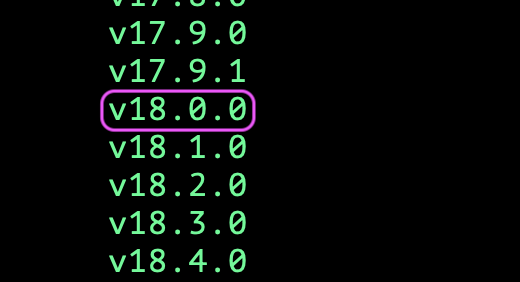

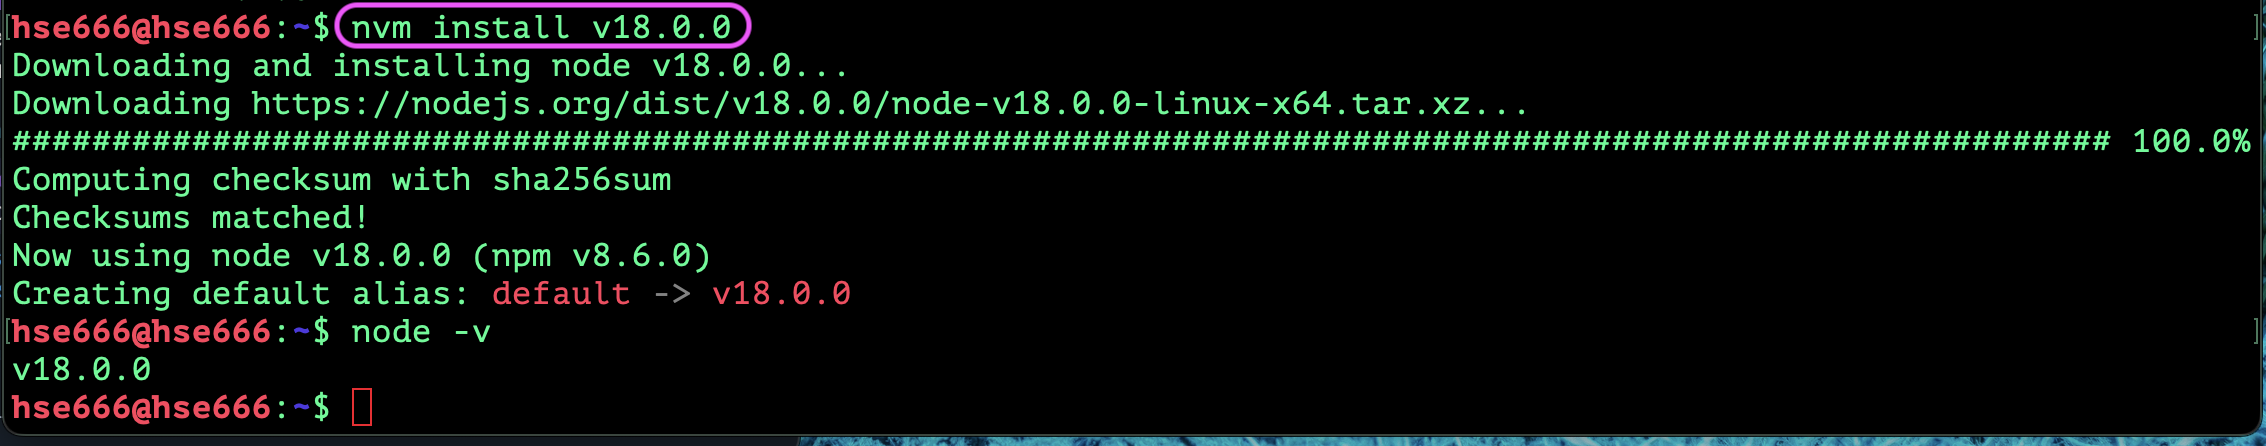

# Теперь нужен пакетный менеджер JavaScrips (что бы установить jbrowse) - что бы его установить и нужен nodejs версии 18.
## Заходим на сайт
https://www.npmjs.compackagenpm#npm---a-javascript-package-manager
## и копируем curl запрос на скачивание

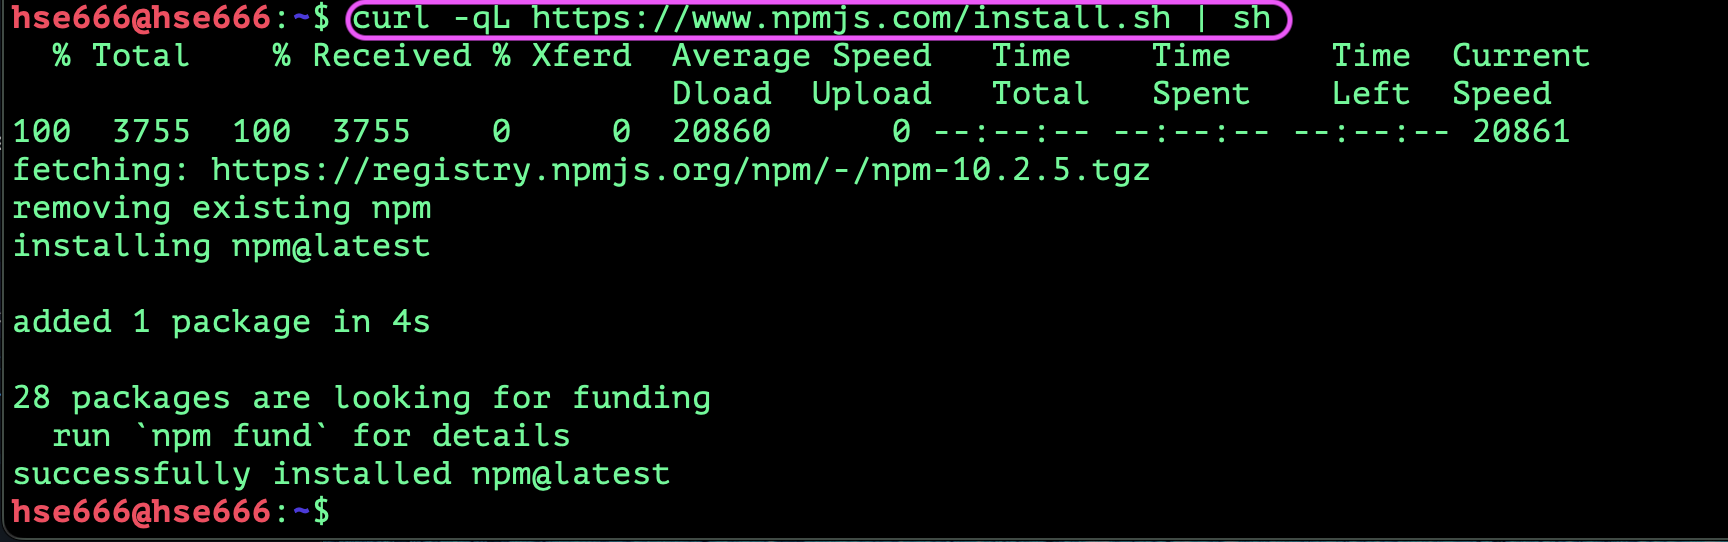

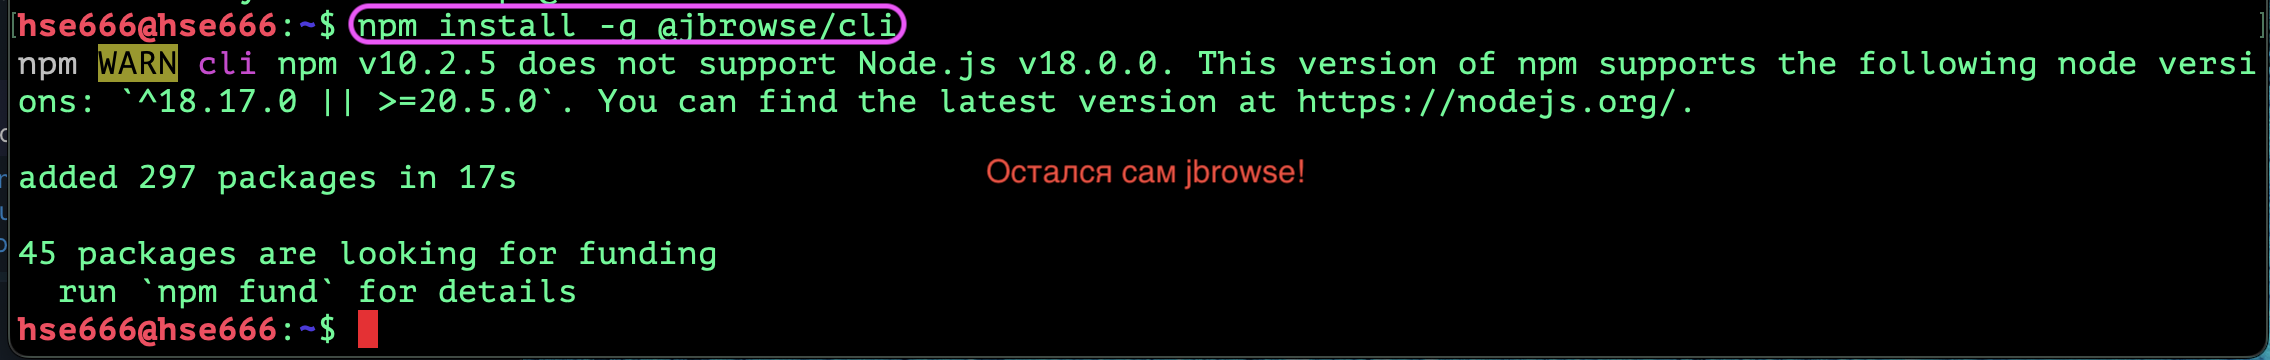

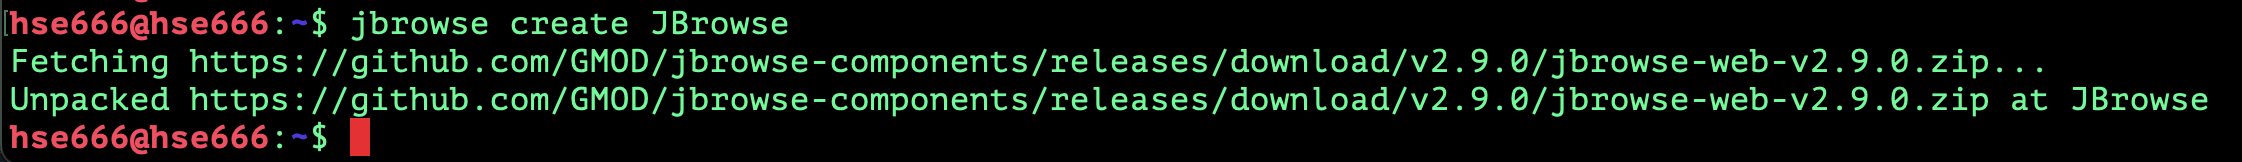

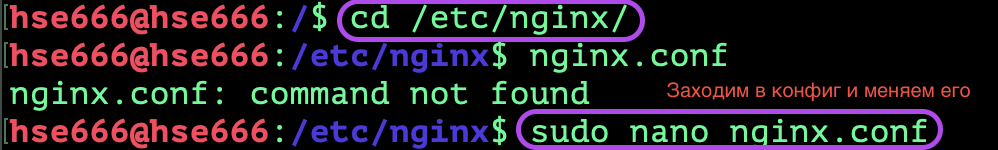

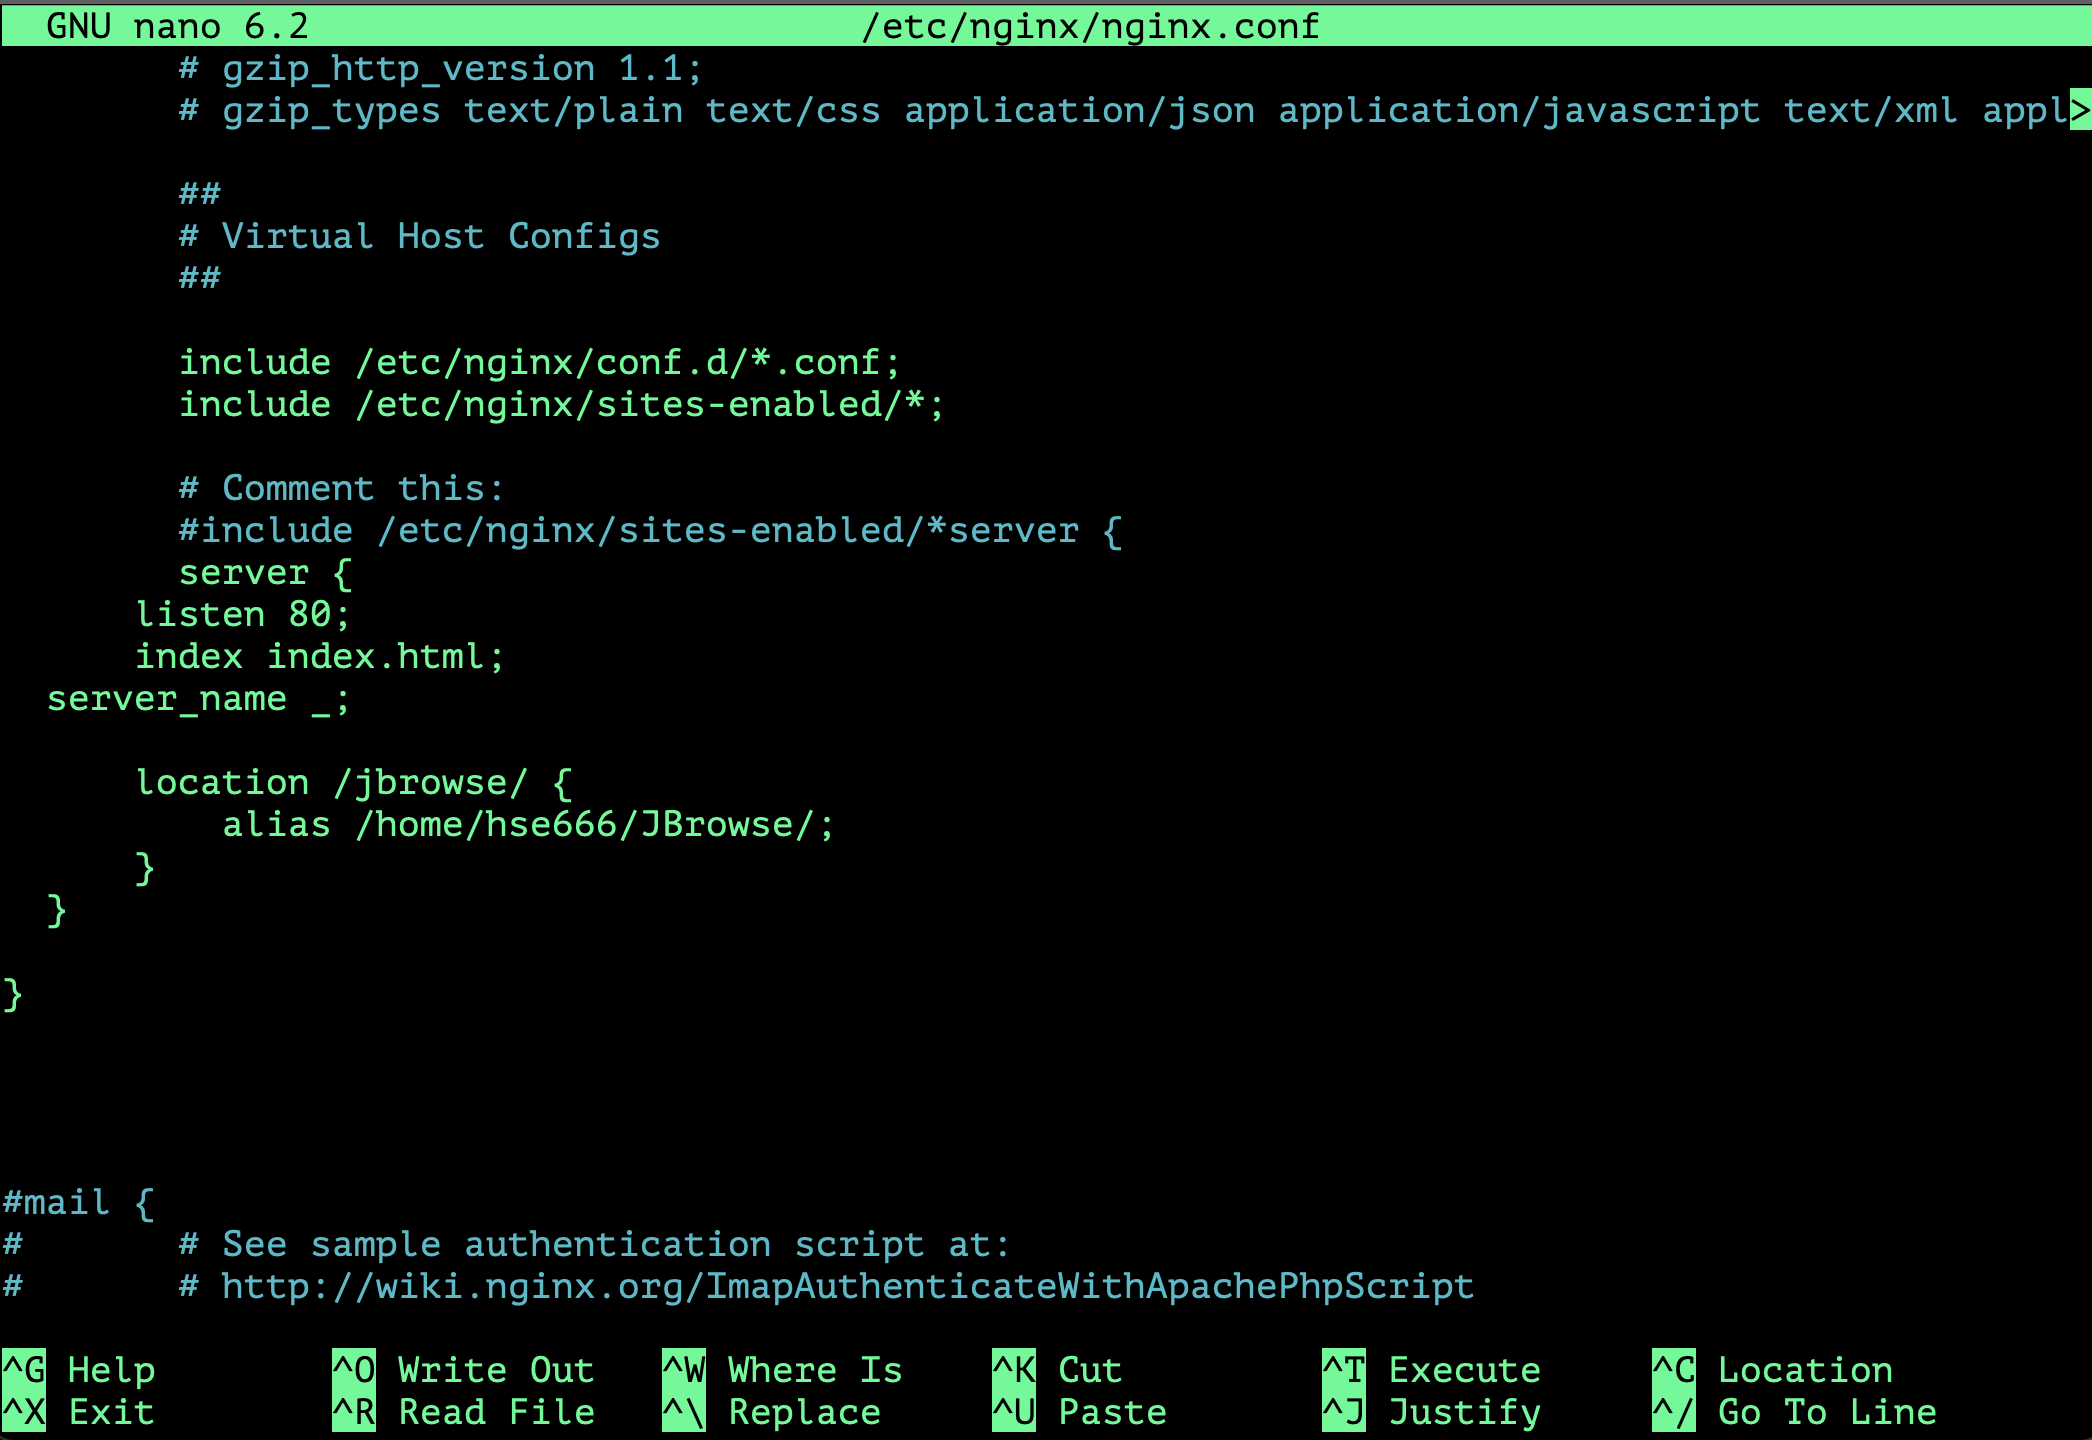

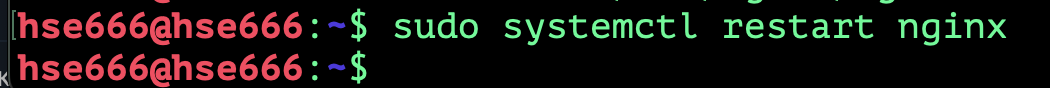

# Браузер не работал, долго искал причину почему (при выполнении sudo nginx -t программа сетовала на то что server_name _ игнорируется), ну я поменял его на localhost и ву а ля

# проверяем паблик айпи и заходим на сайт:

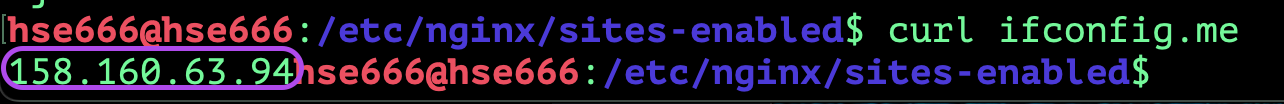

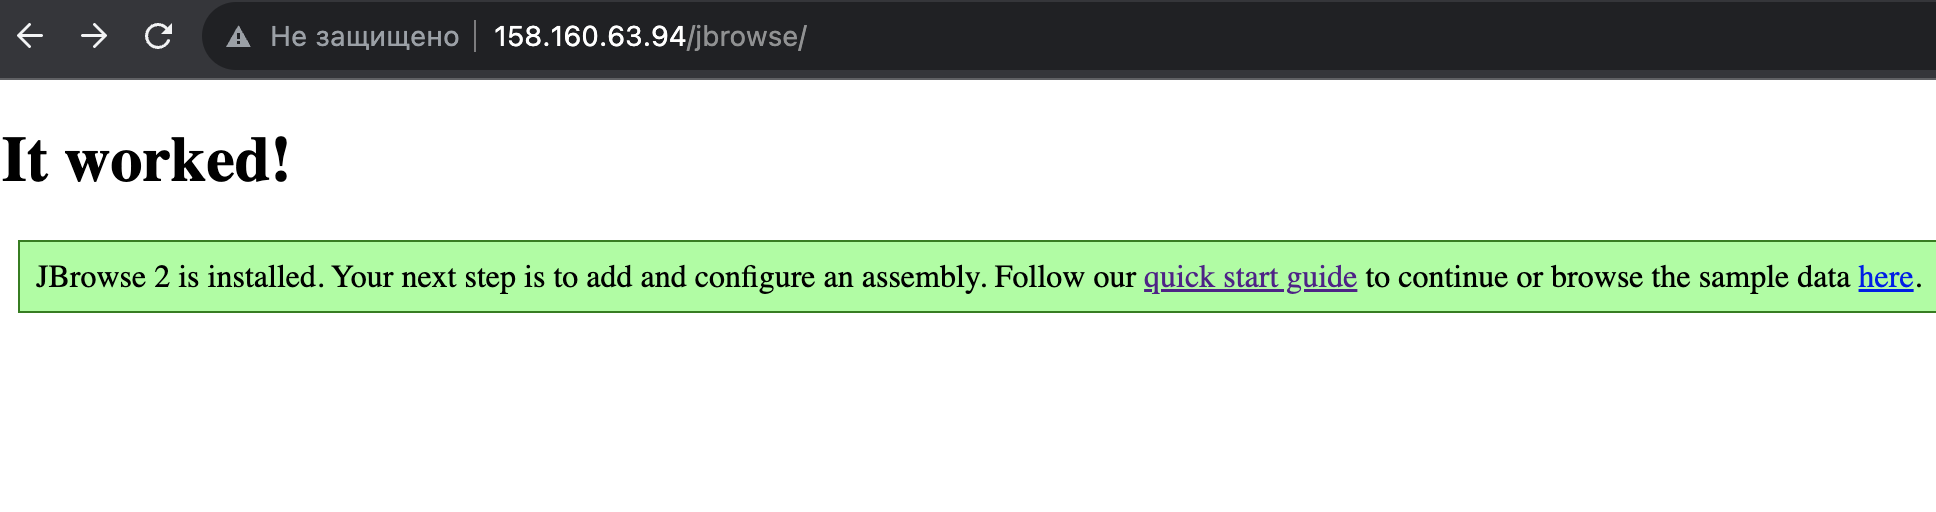

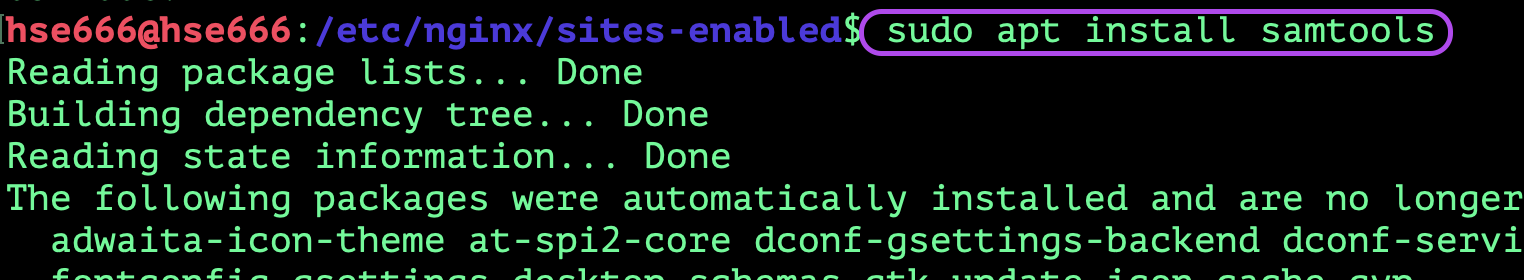

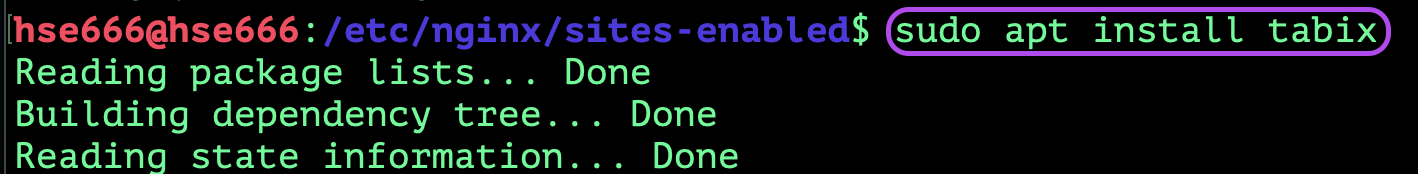

# качаем геном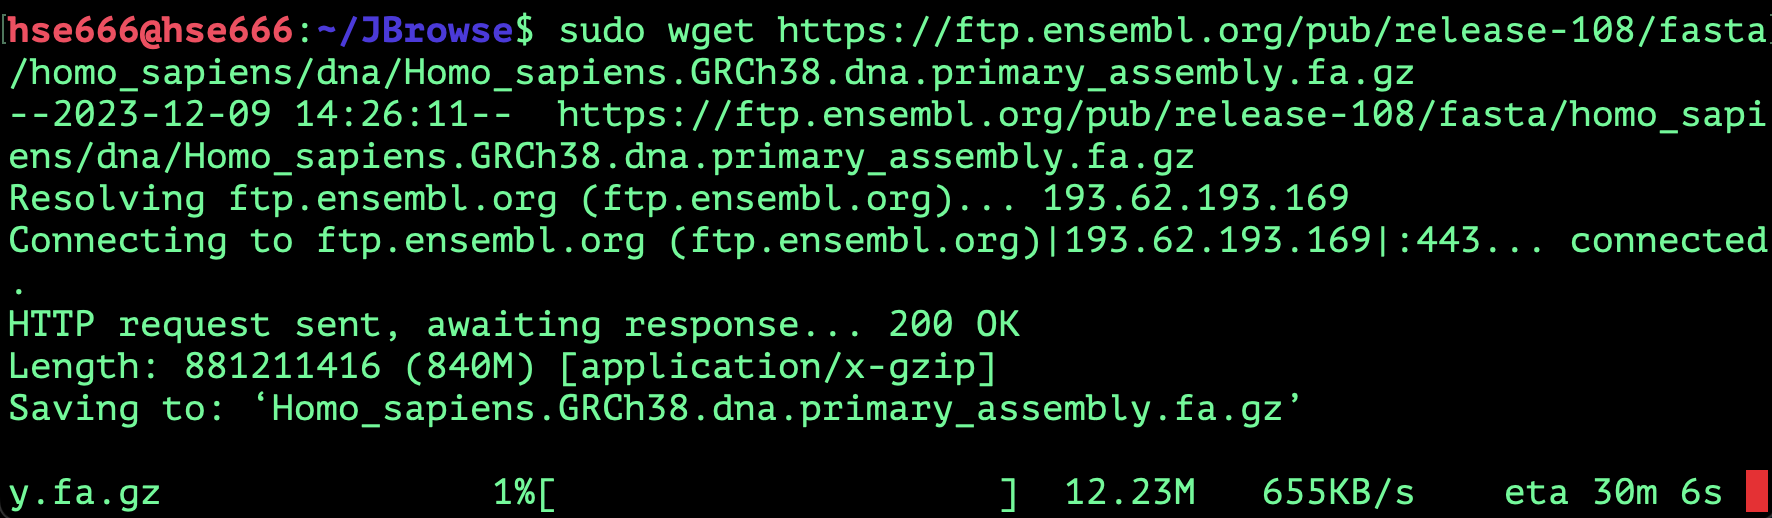

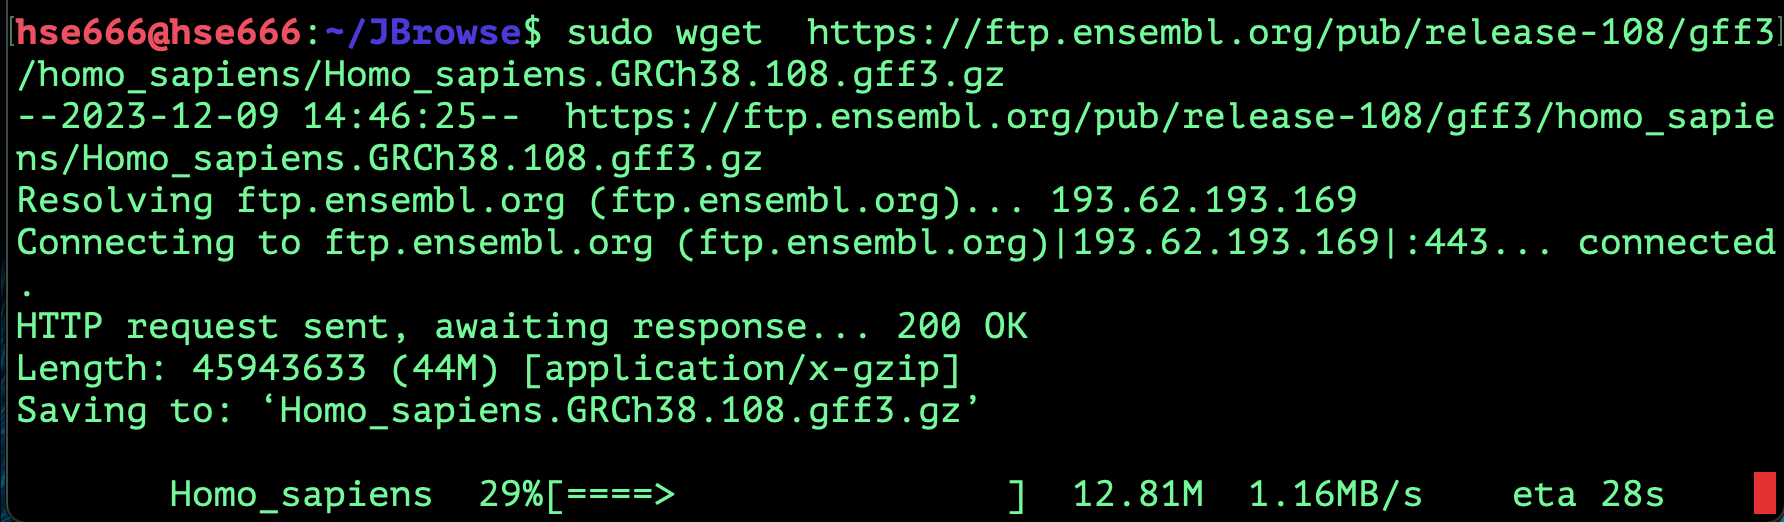

# gunzip'аем файлы и получаем в итоге:

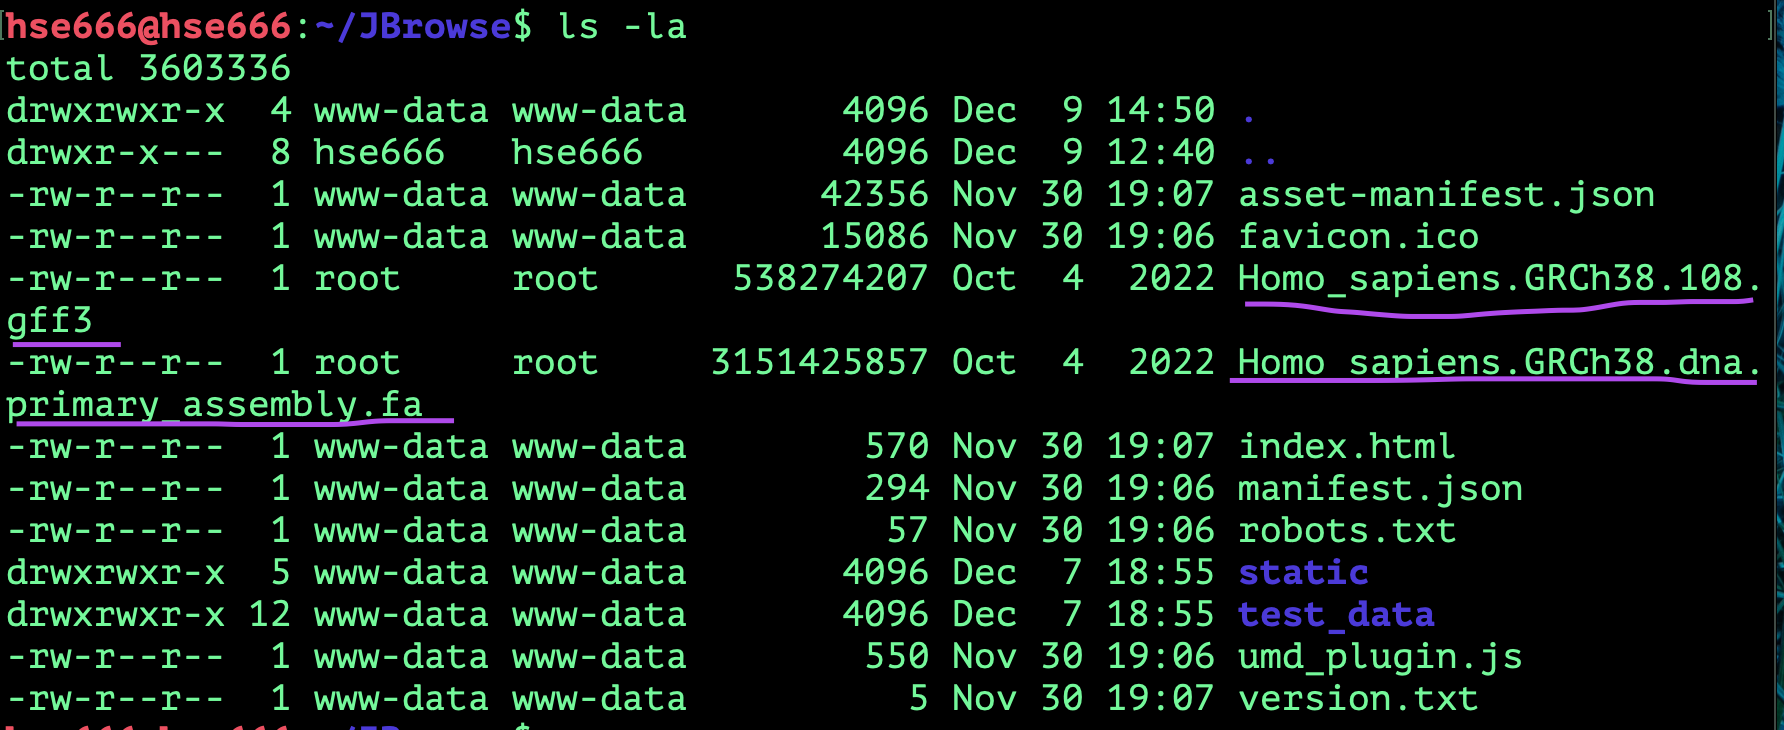

# проводим все процедуры по скачиванию чип и атак секов, и применяем все пакеты

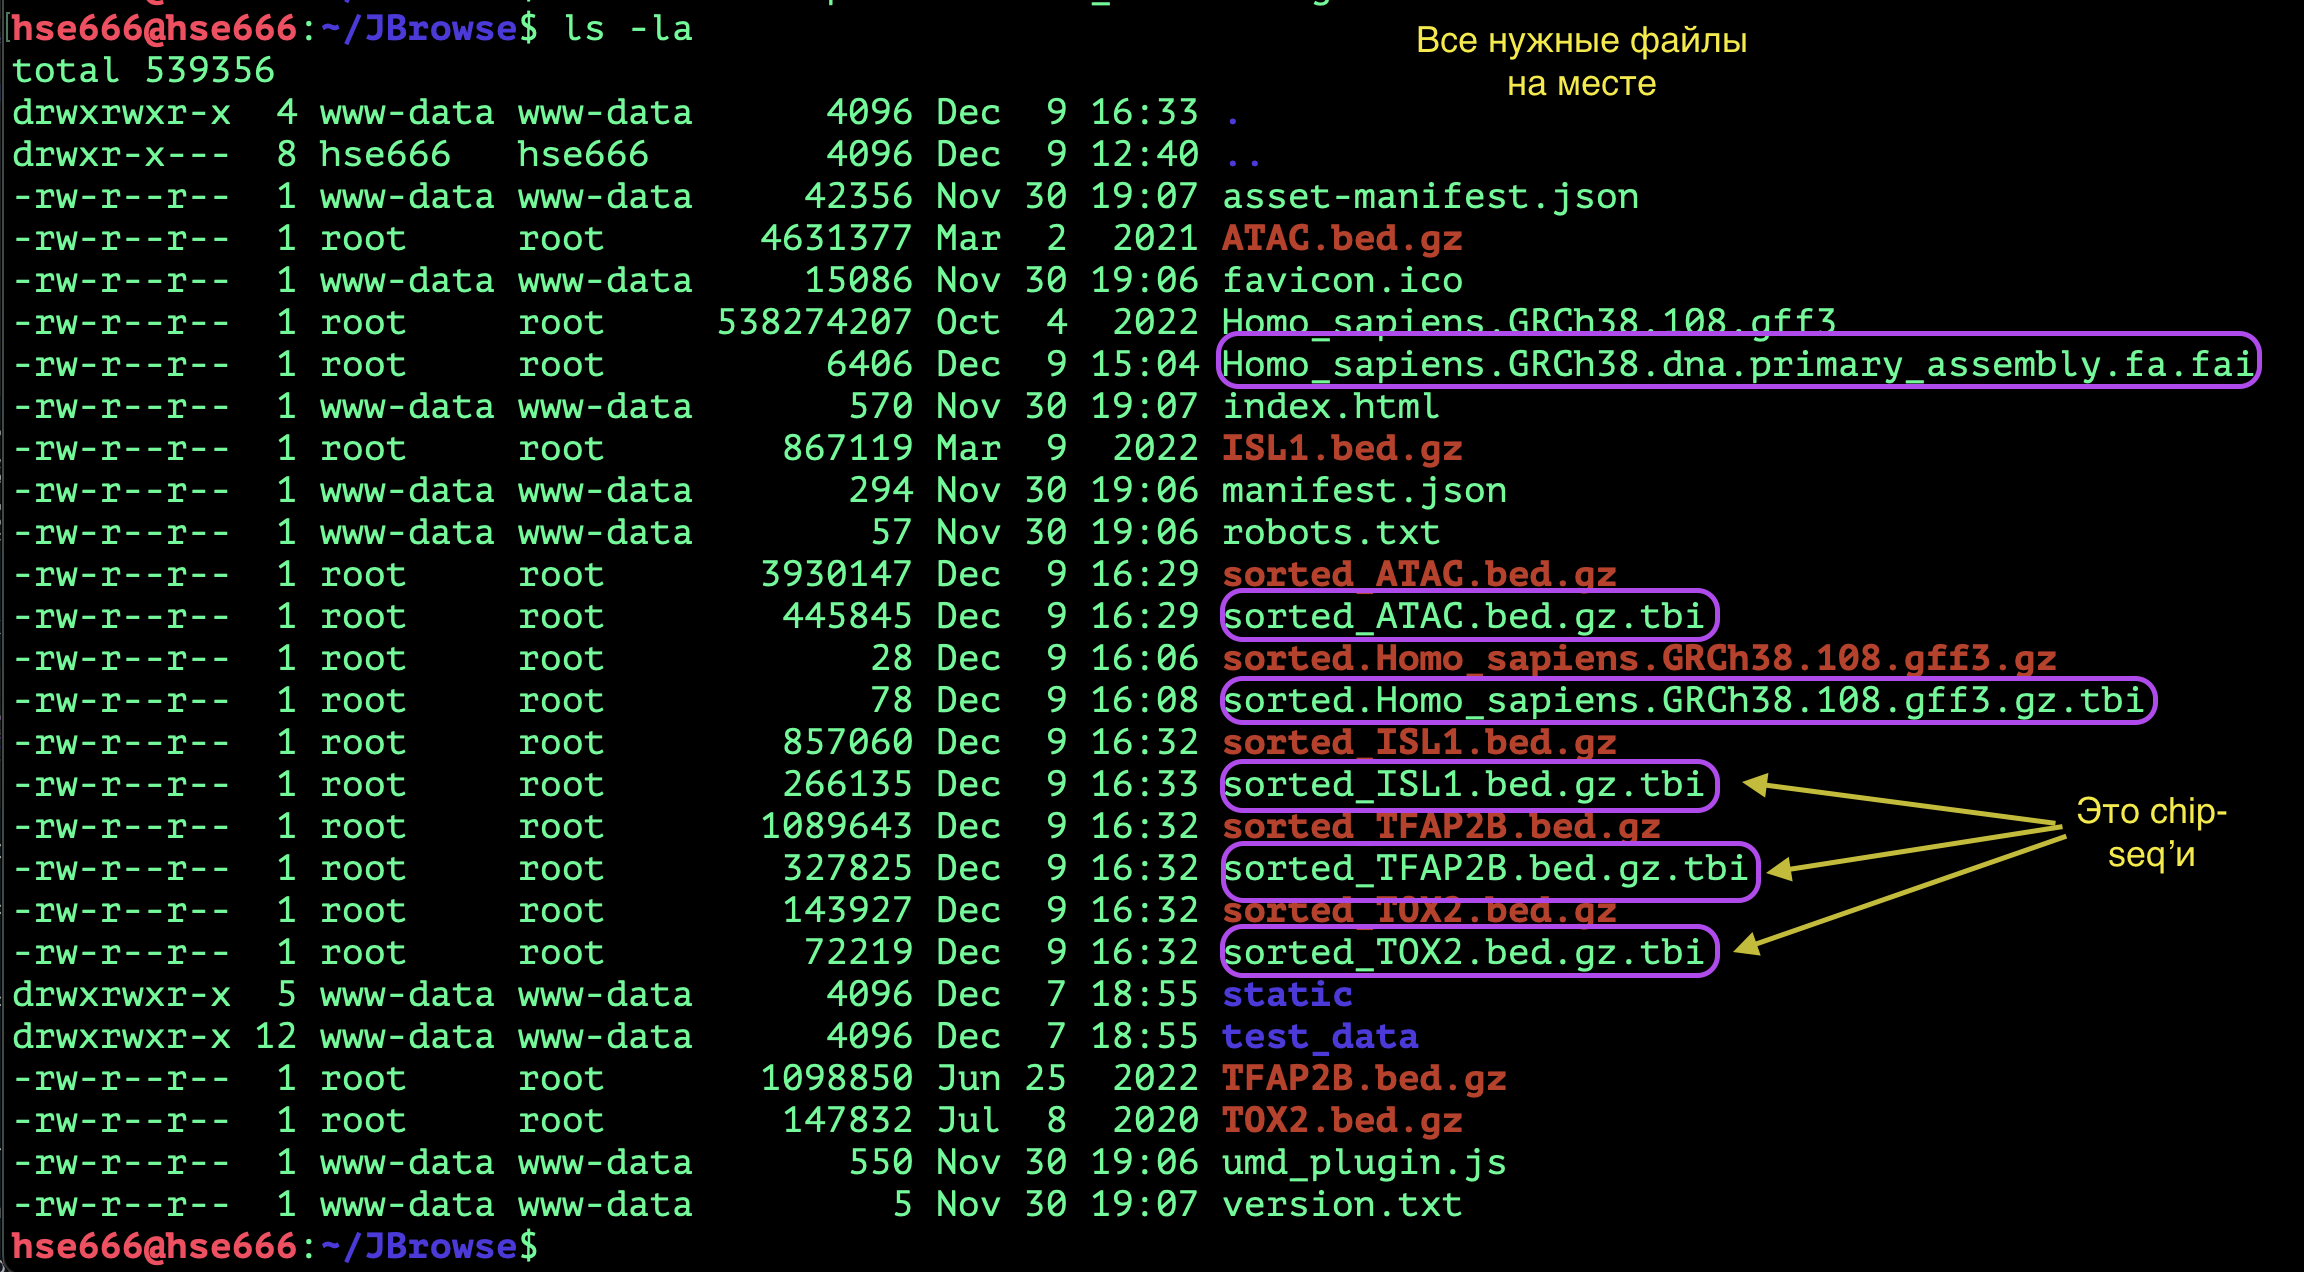

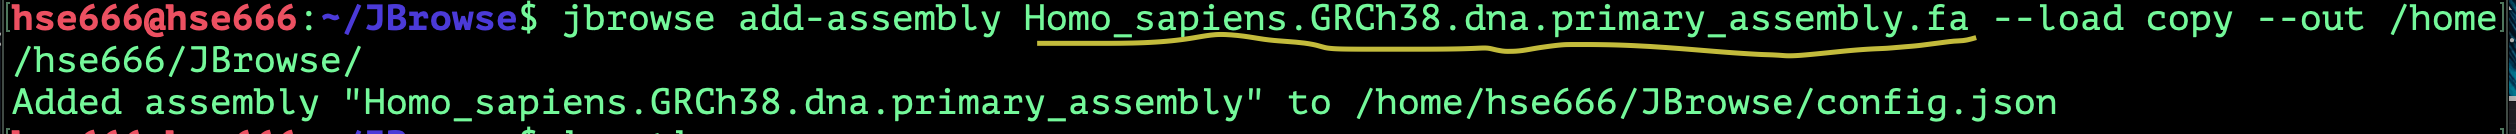

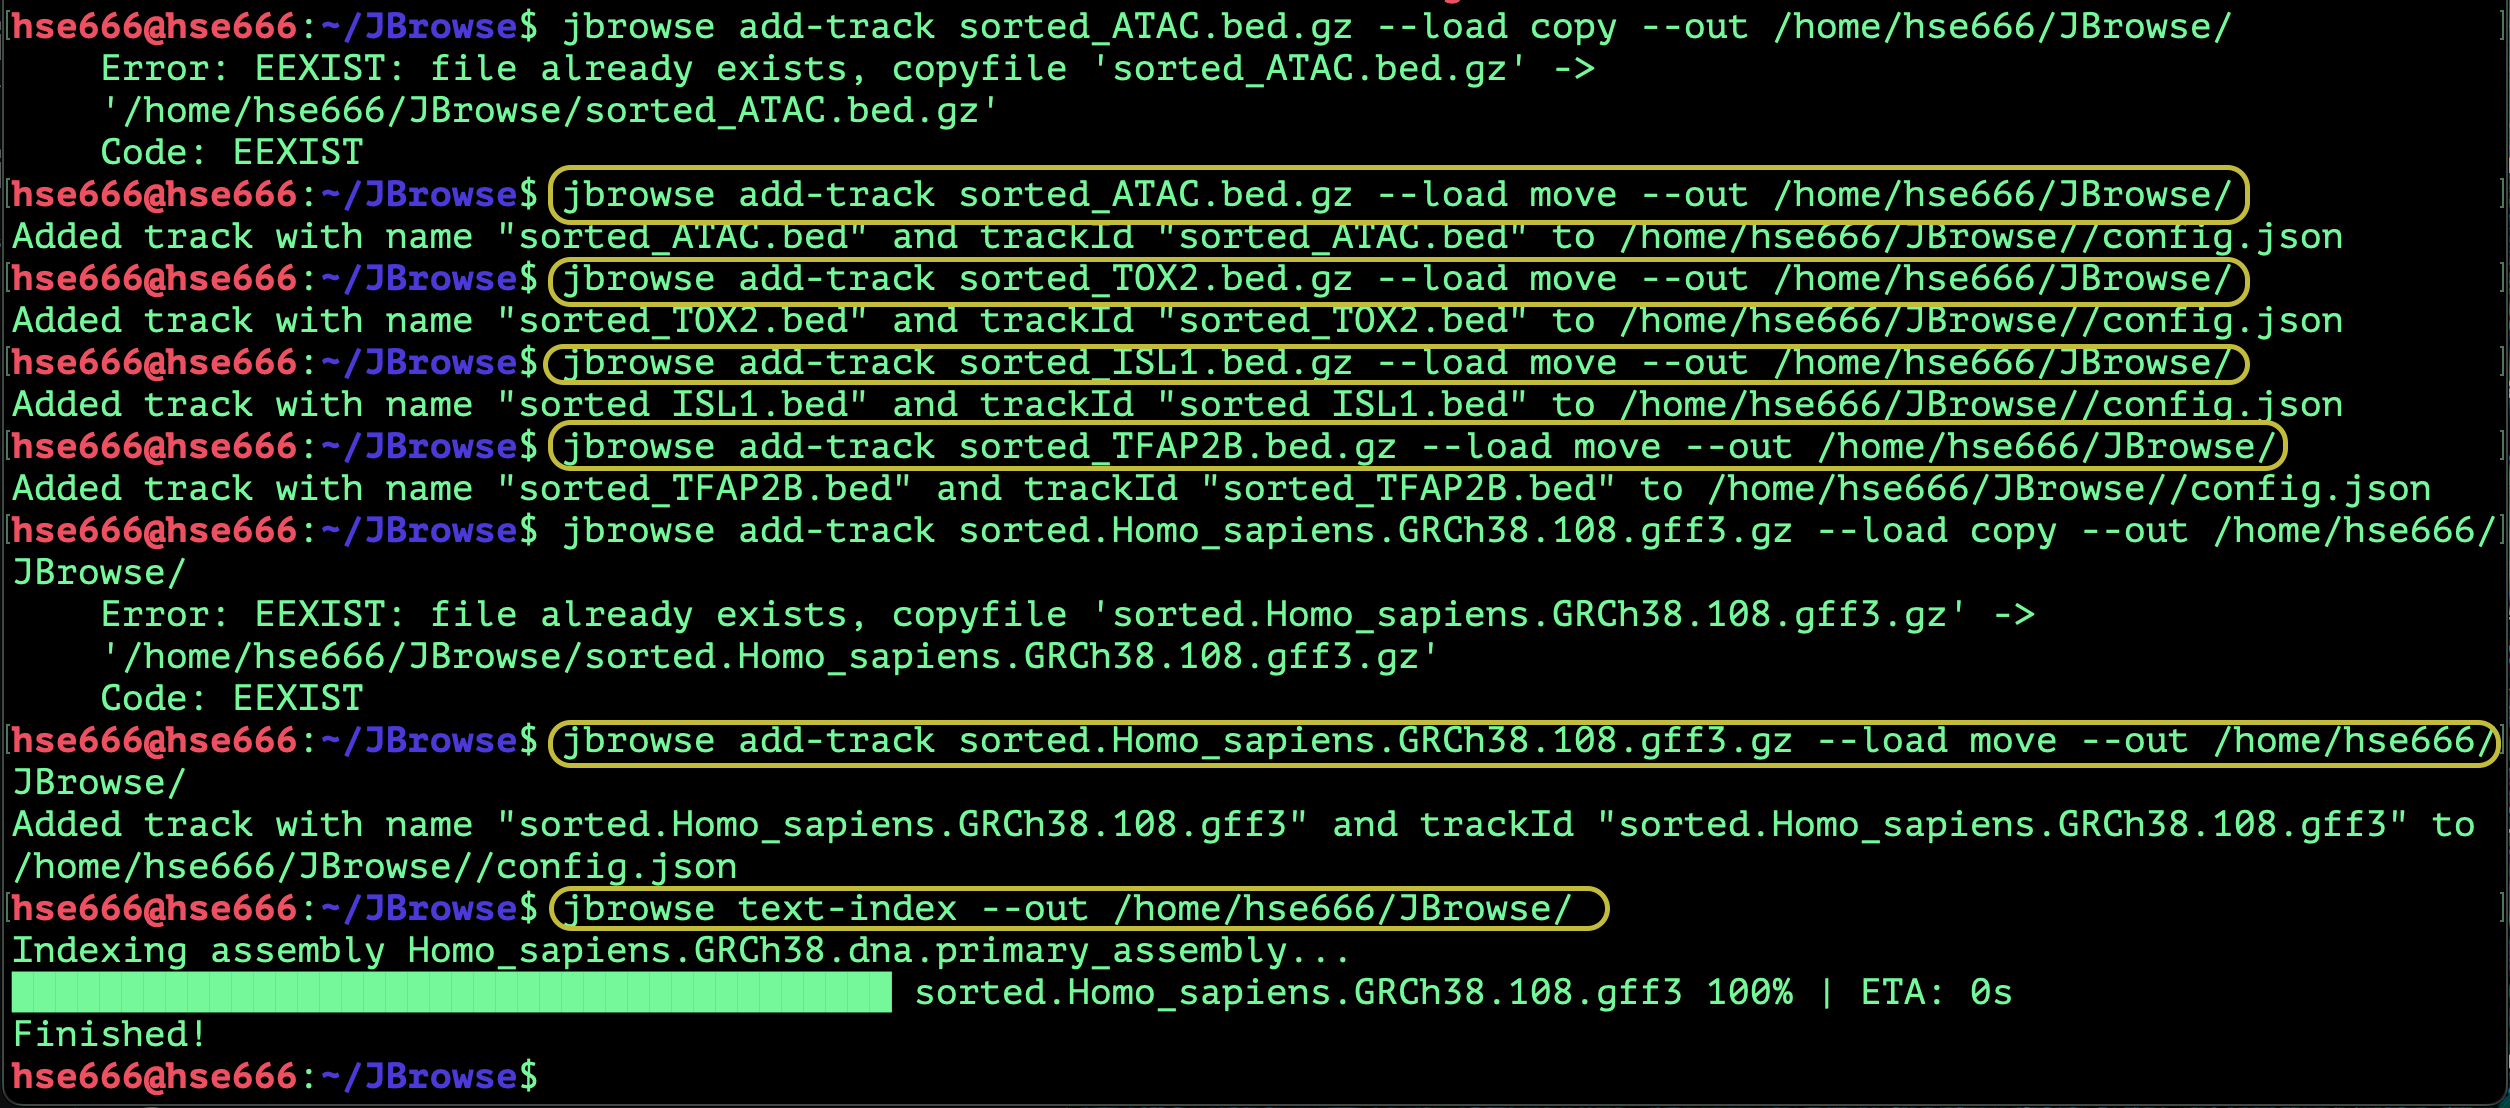

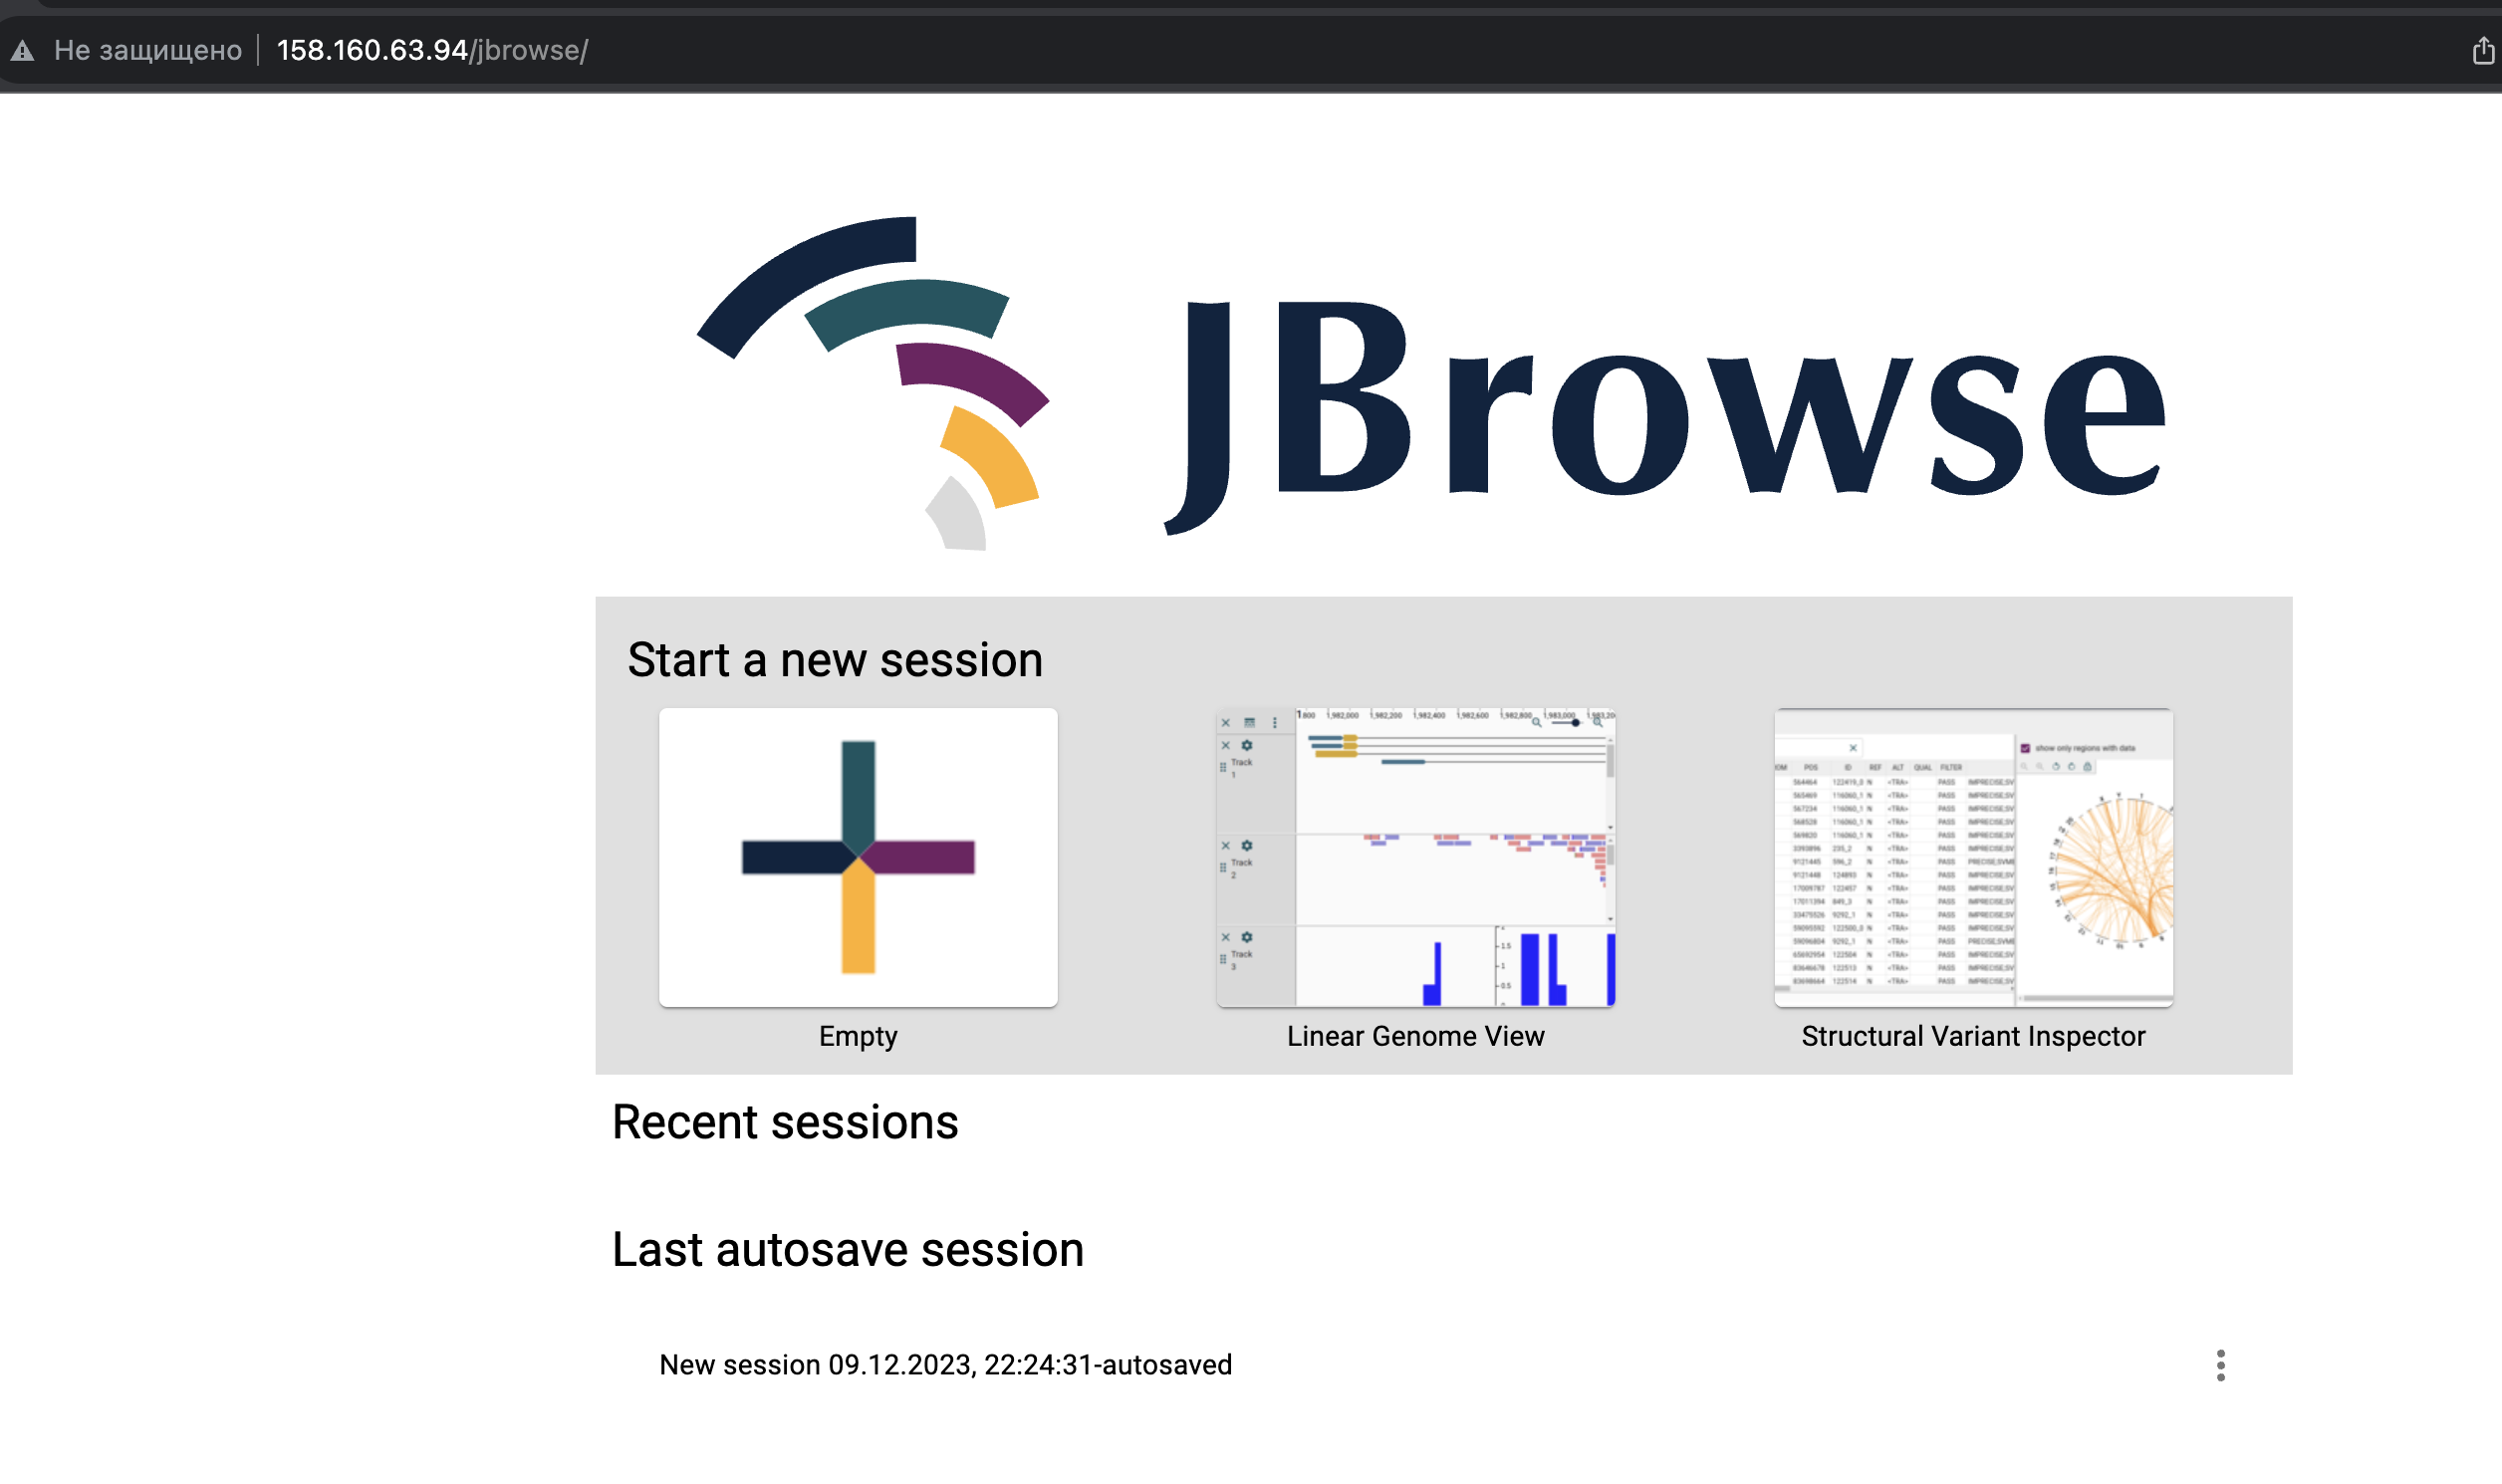

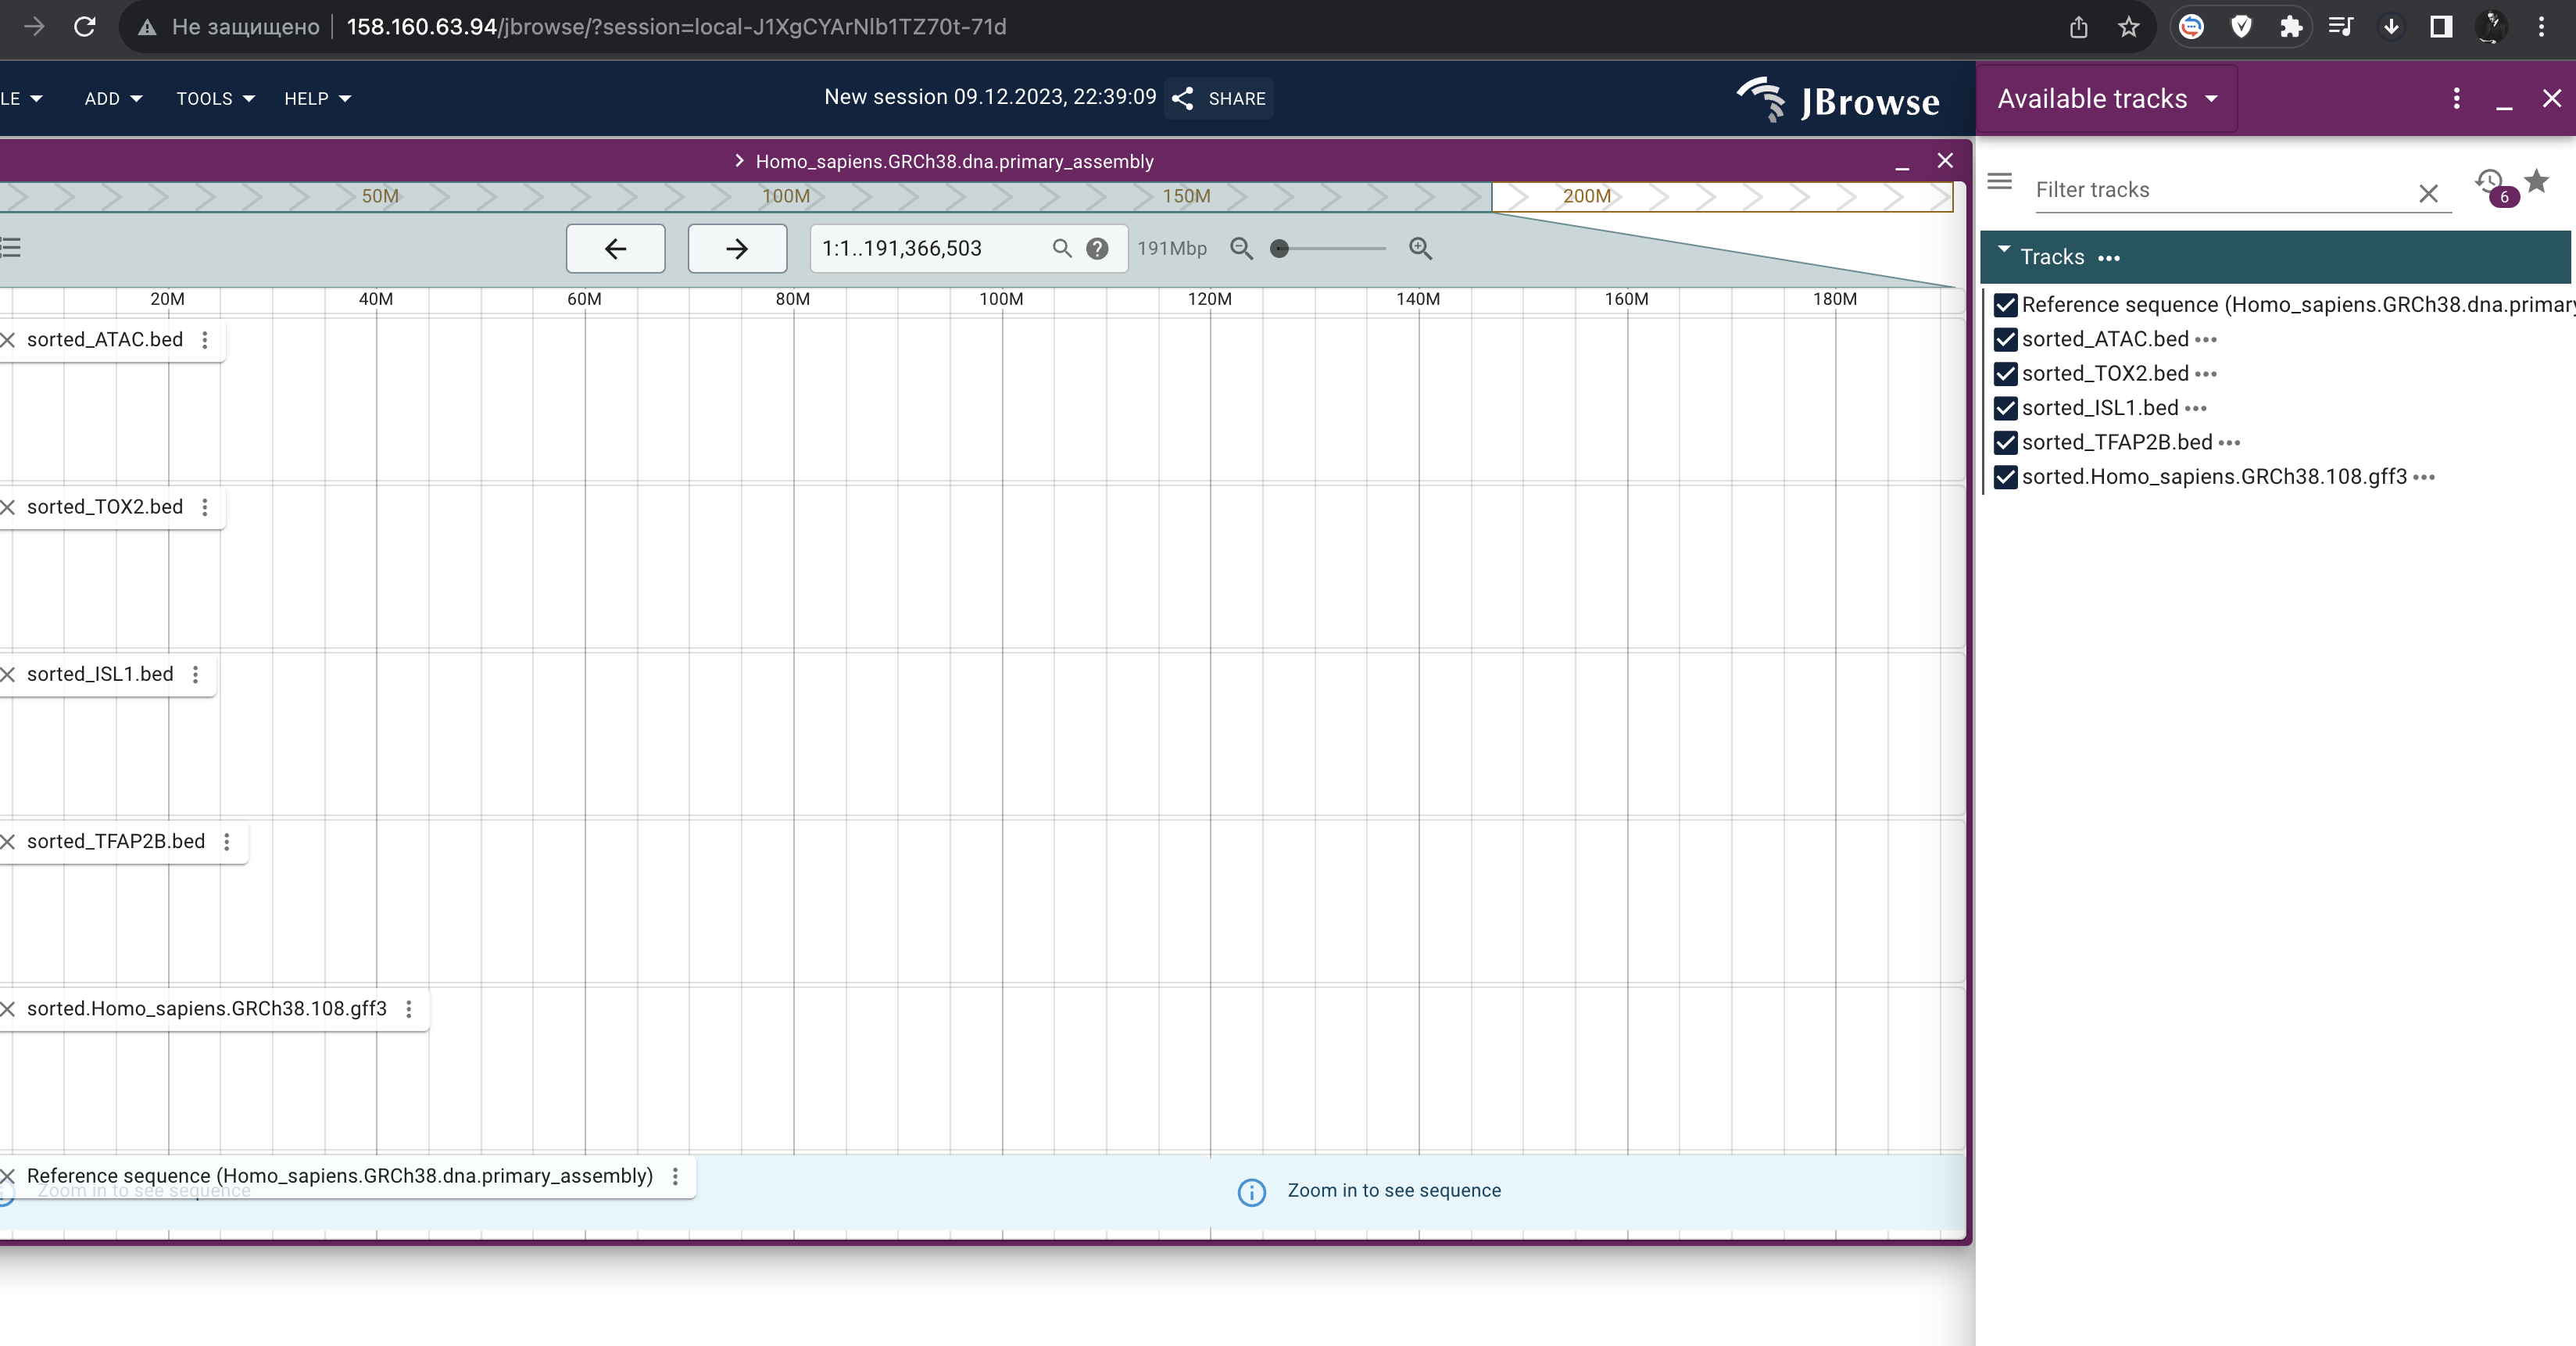

## Extra points [1.5]

* [1.25] Wrap 3 last steps into Snakemake pipeline.

<u>*TIP*</u> You may have the rules below. Rule to add assembly to JBrowse. Rule to process and add tracks to JBrowse. Rule to add GFF3 track to JBrowse. Rule to add BED tracks to JBrowse.

* [0.25] Add a picture that represents your experience with this HW.

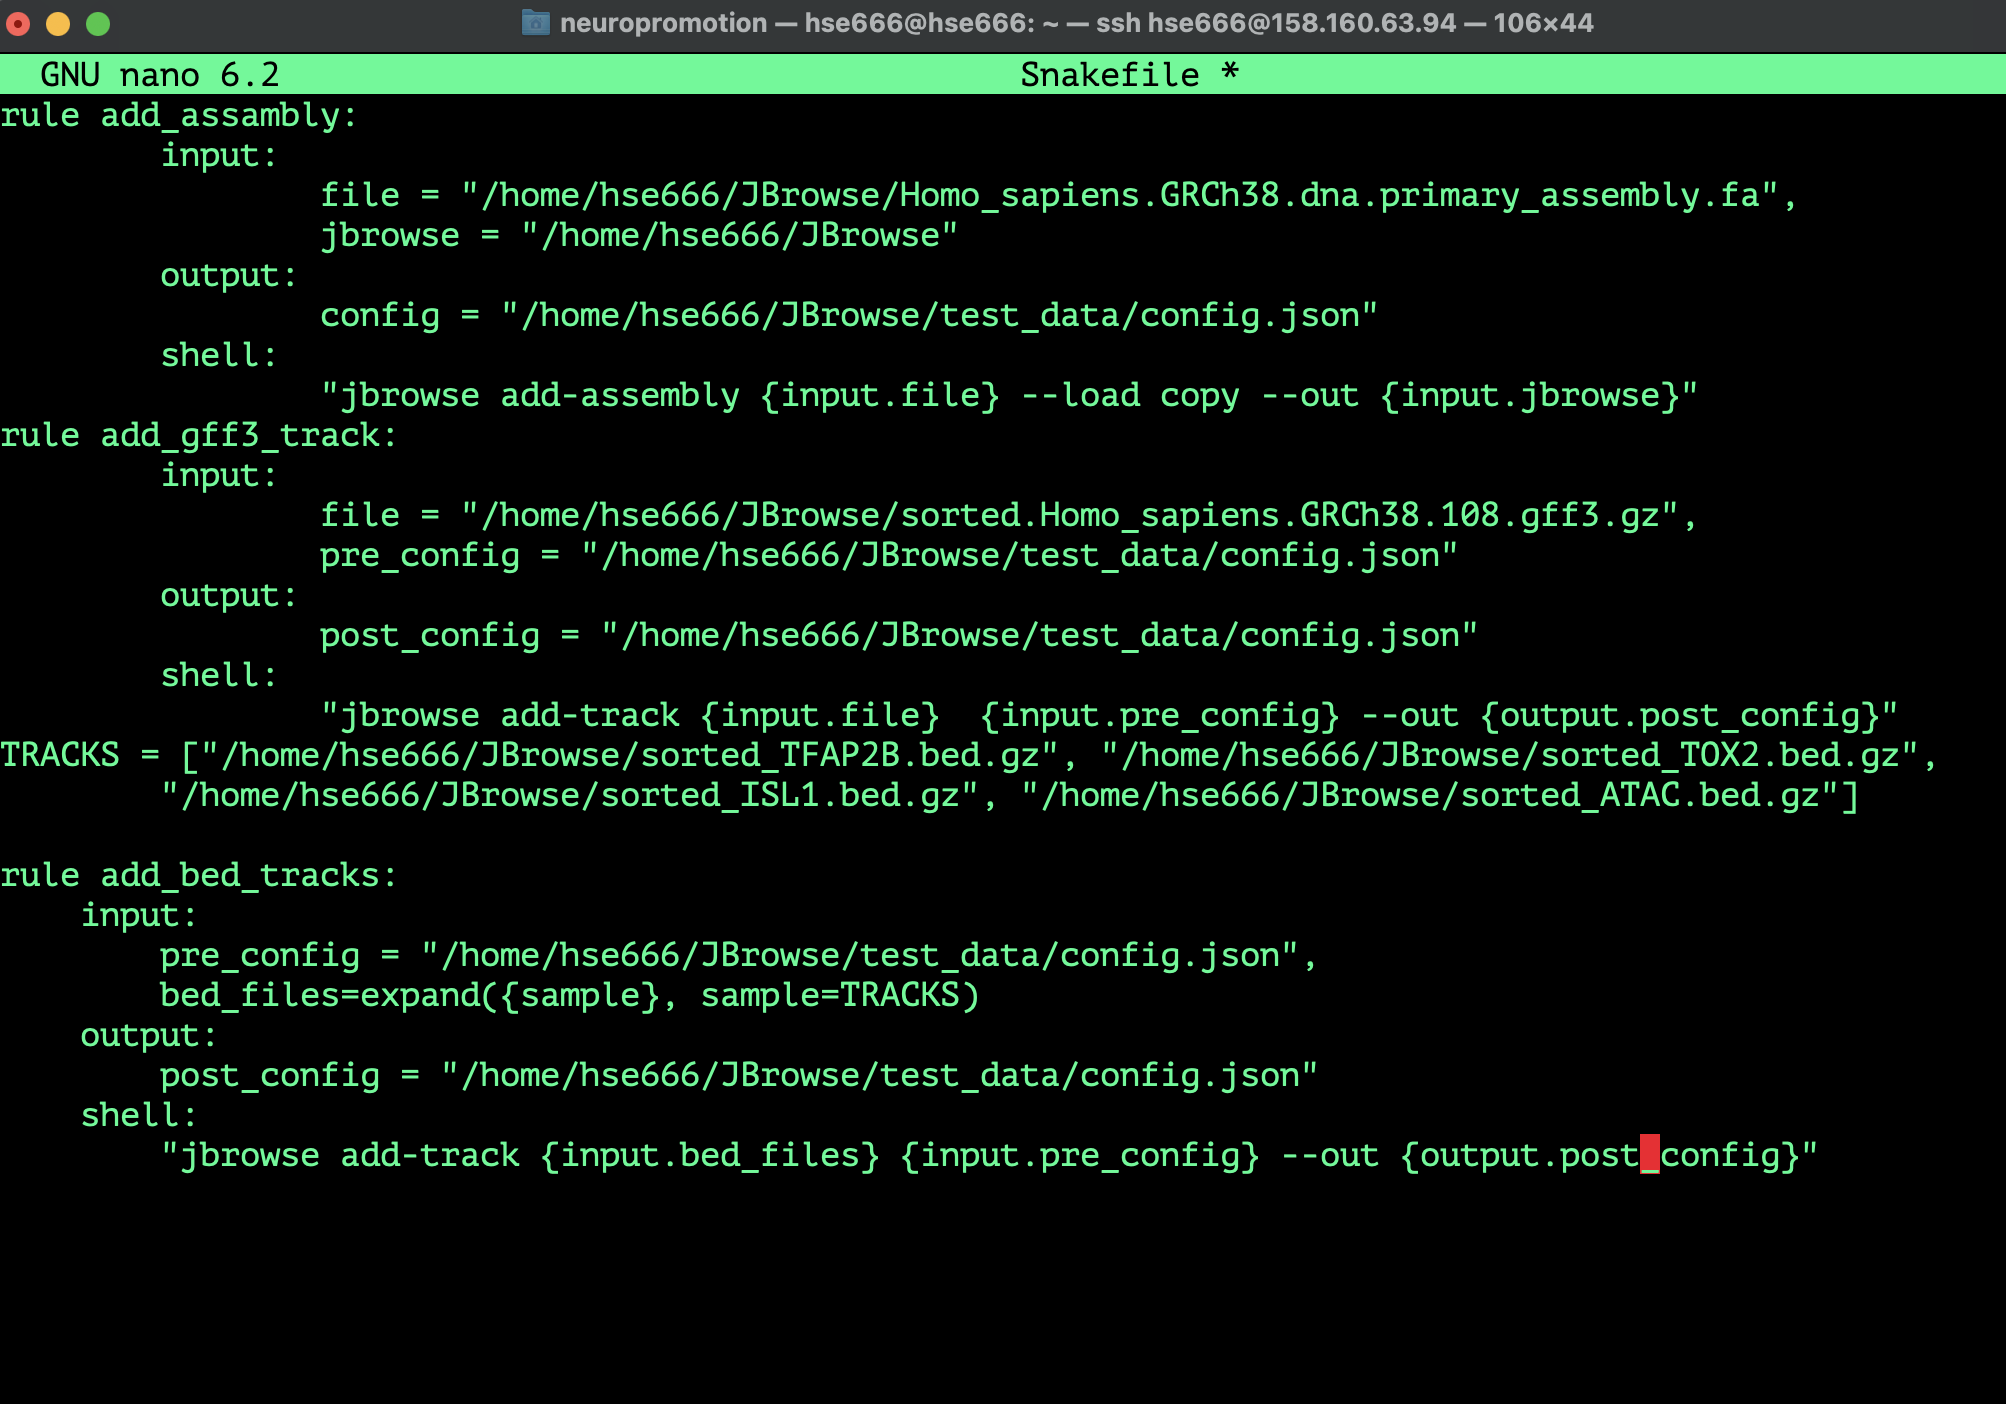

# лол, места нет. Причем я поудалял че мог, не помогает. Это установка snakemake, он гиг памяти требует

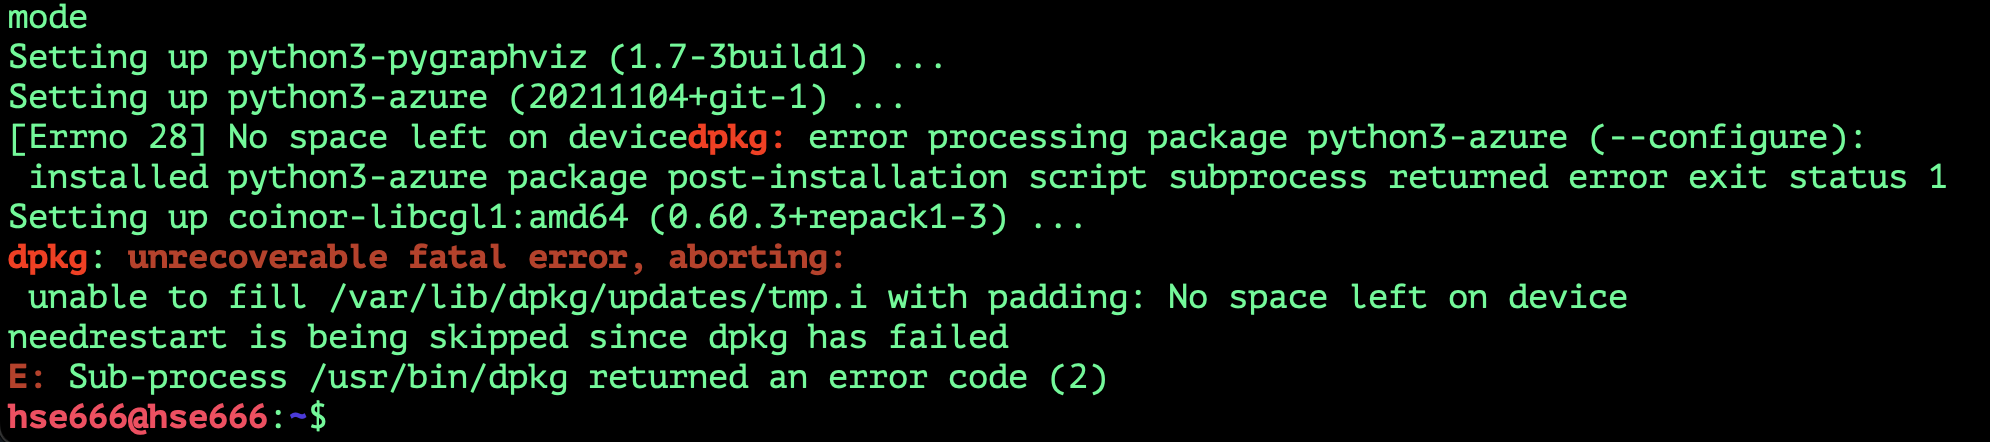

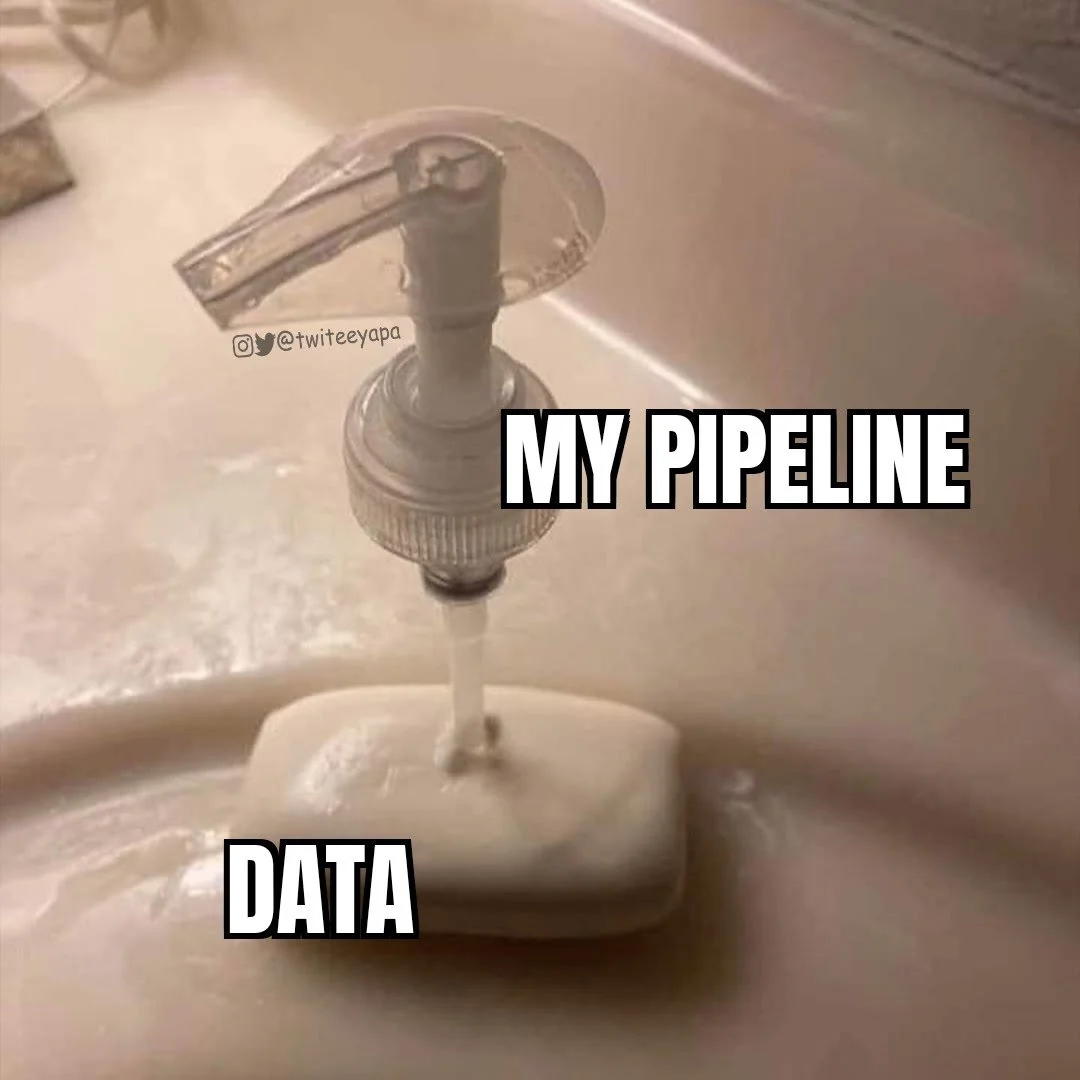